In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import plotly.graph_objects as go
import plotly.express as px

from statsmodels.nonparametric.smoothers_lowess import lowess

from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
regions = ['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- NSW ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


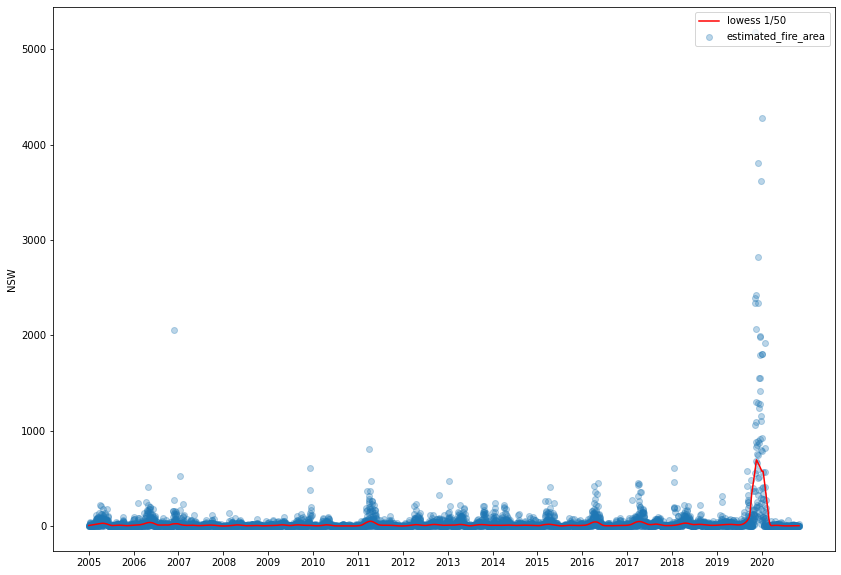

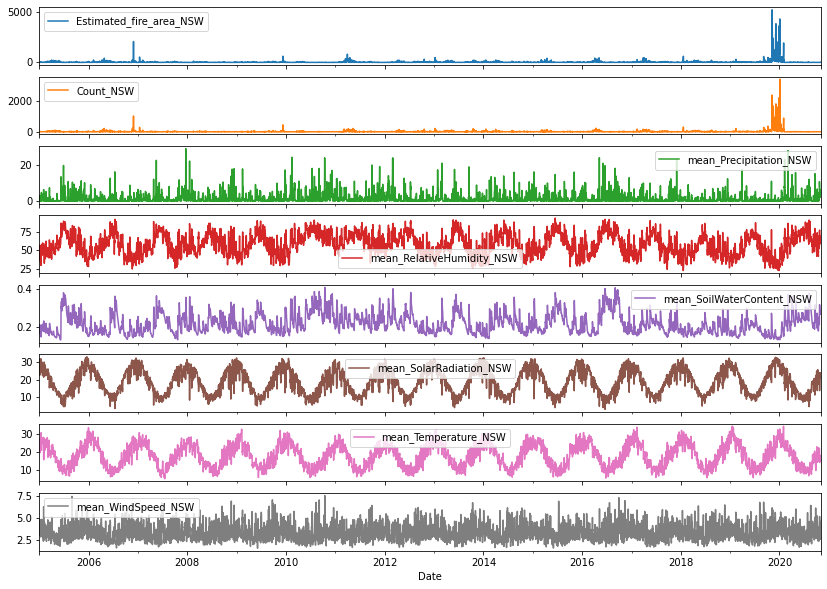

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



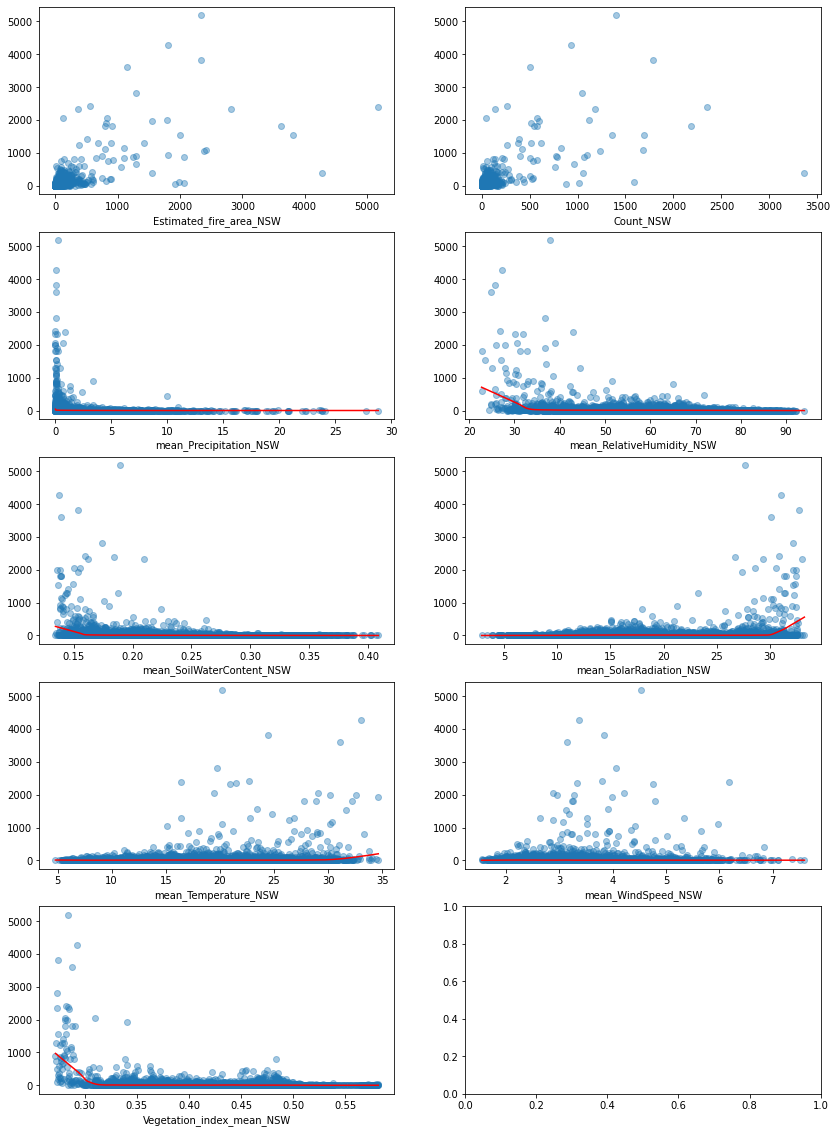

------------------------------------------------------------------------------------------------------------------------


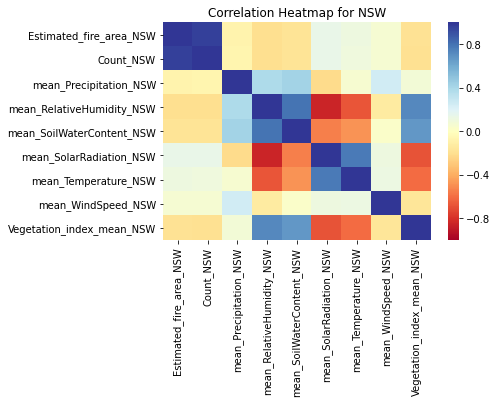

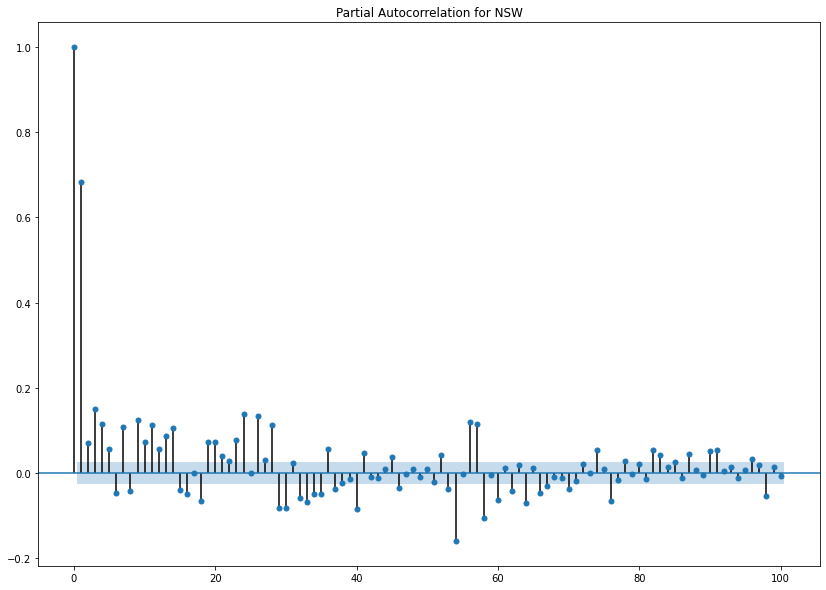

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- NT ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


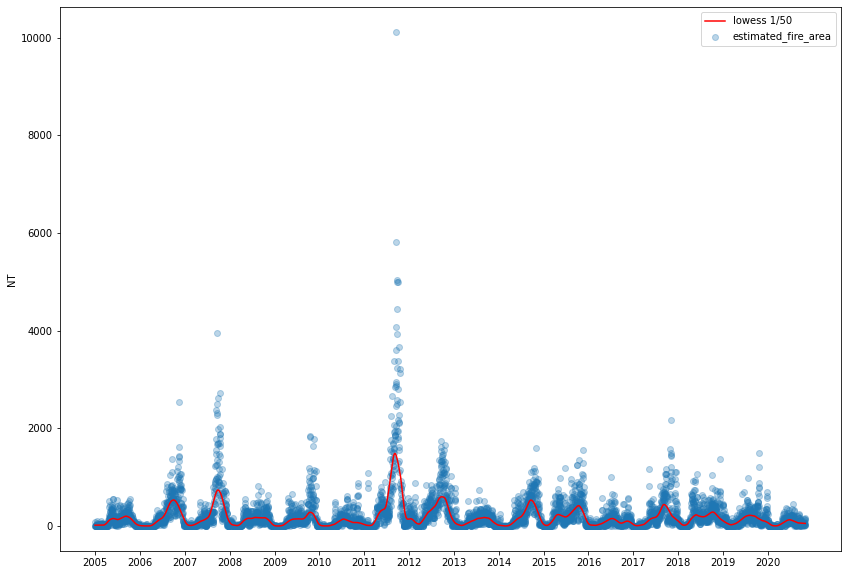

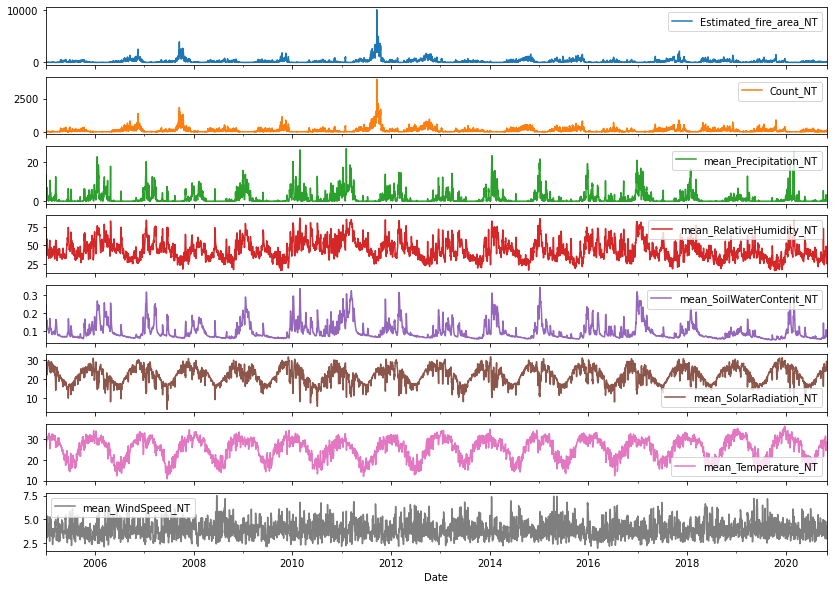

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



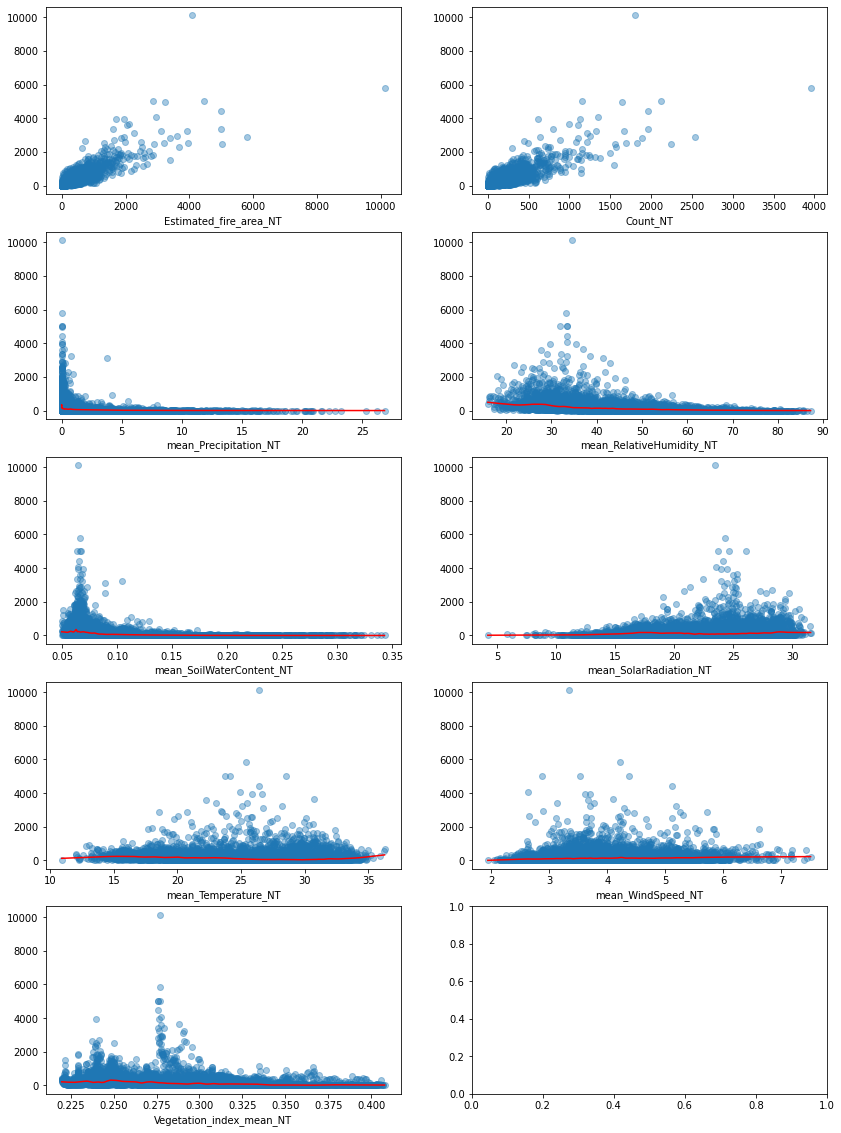

------------------------------------------------------------------------------------------------------------------------


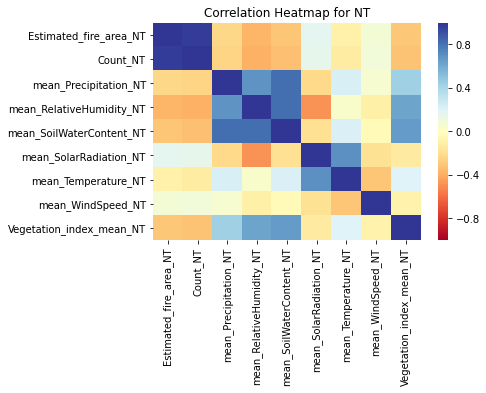

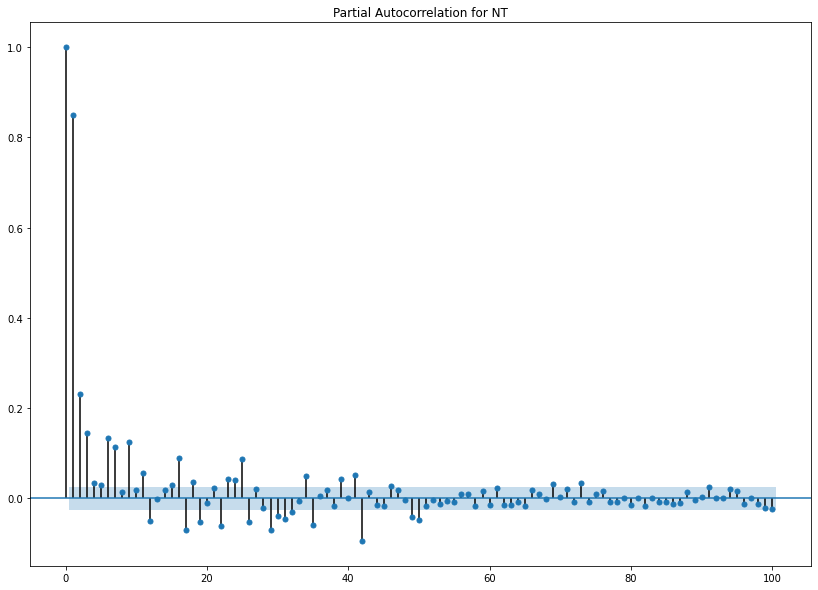

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- QL ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


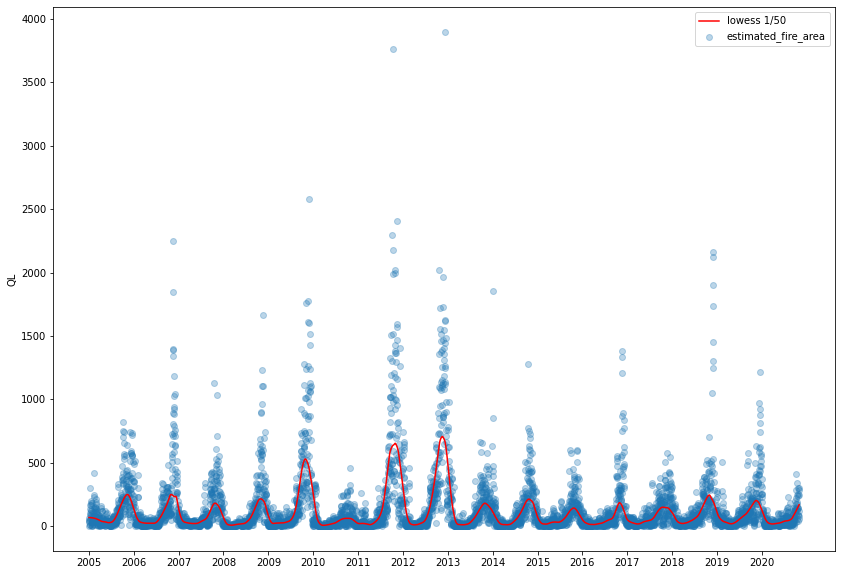

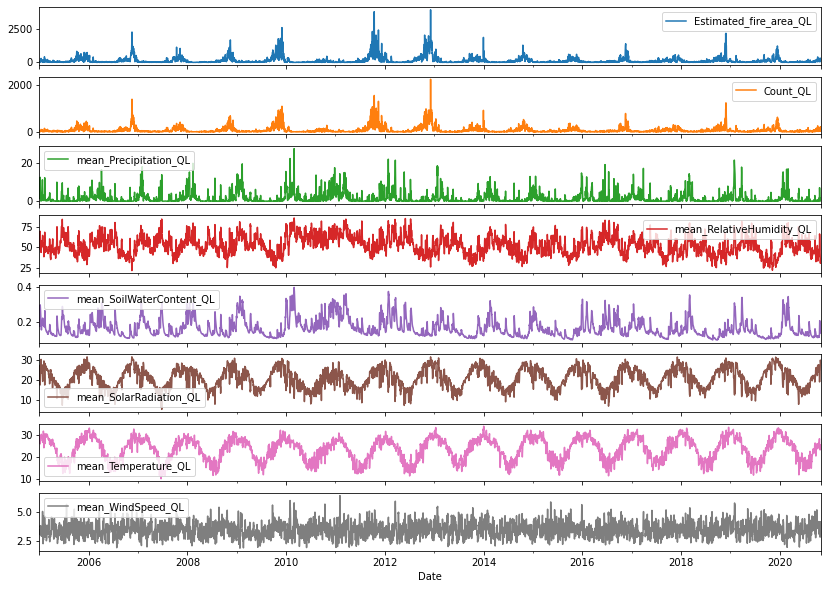

------------------------------------------------------------------------------------------------------------------------


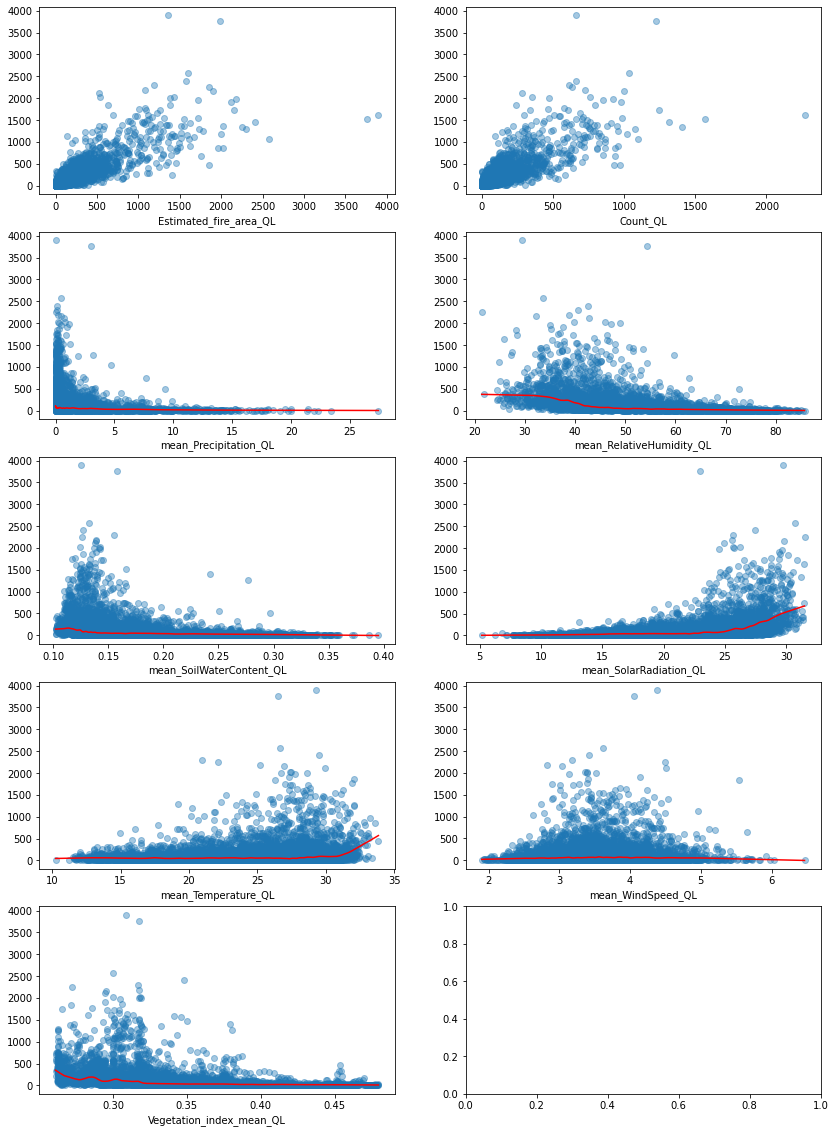

------------------------------------------------------------------------------------------------------------------------


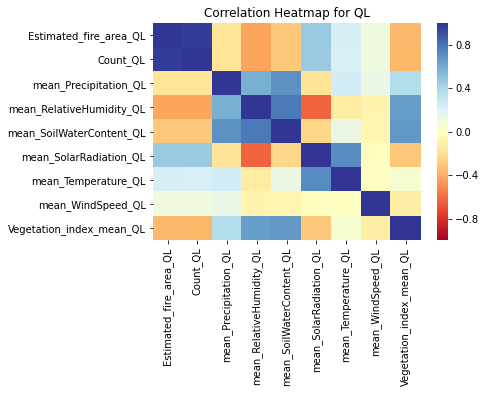

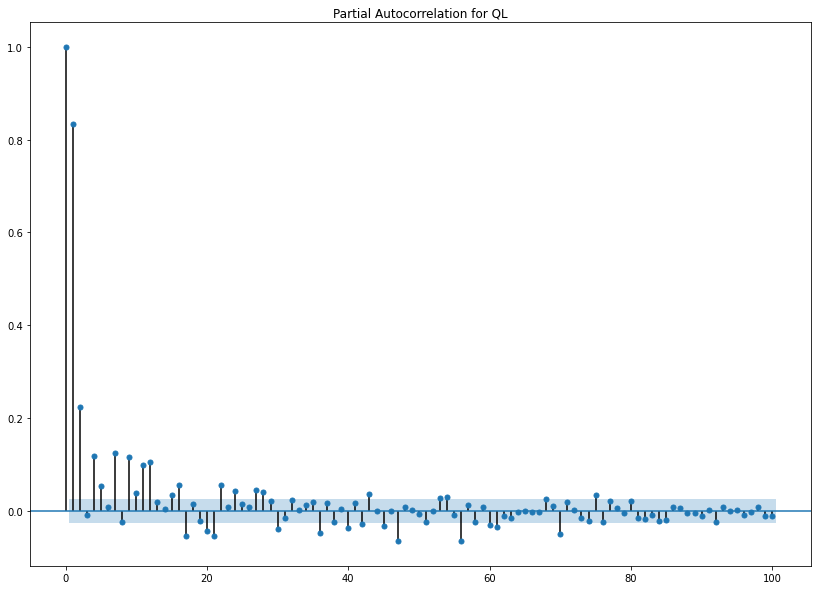

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- SA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


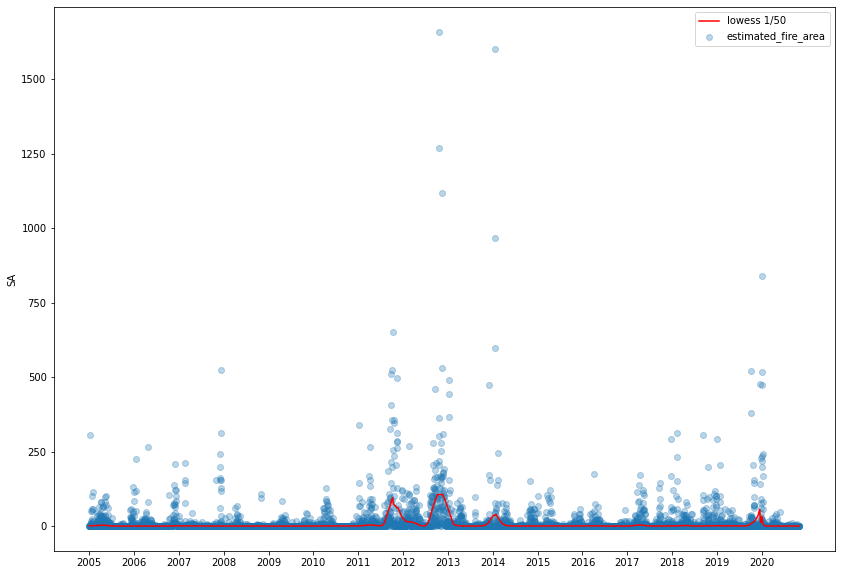

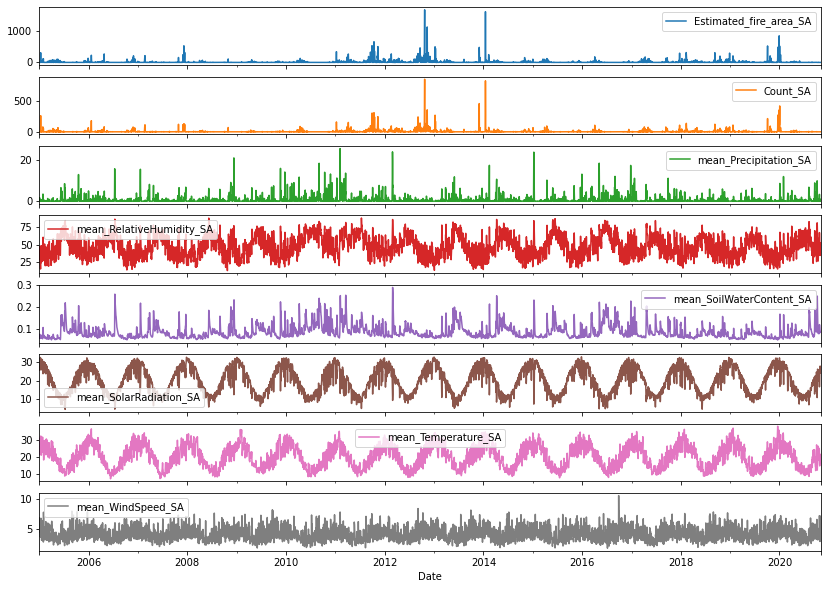

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



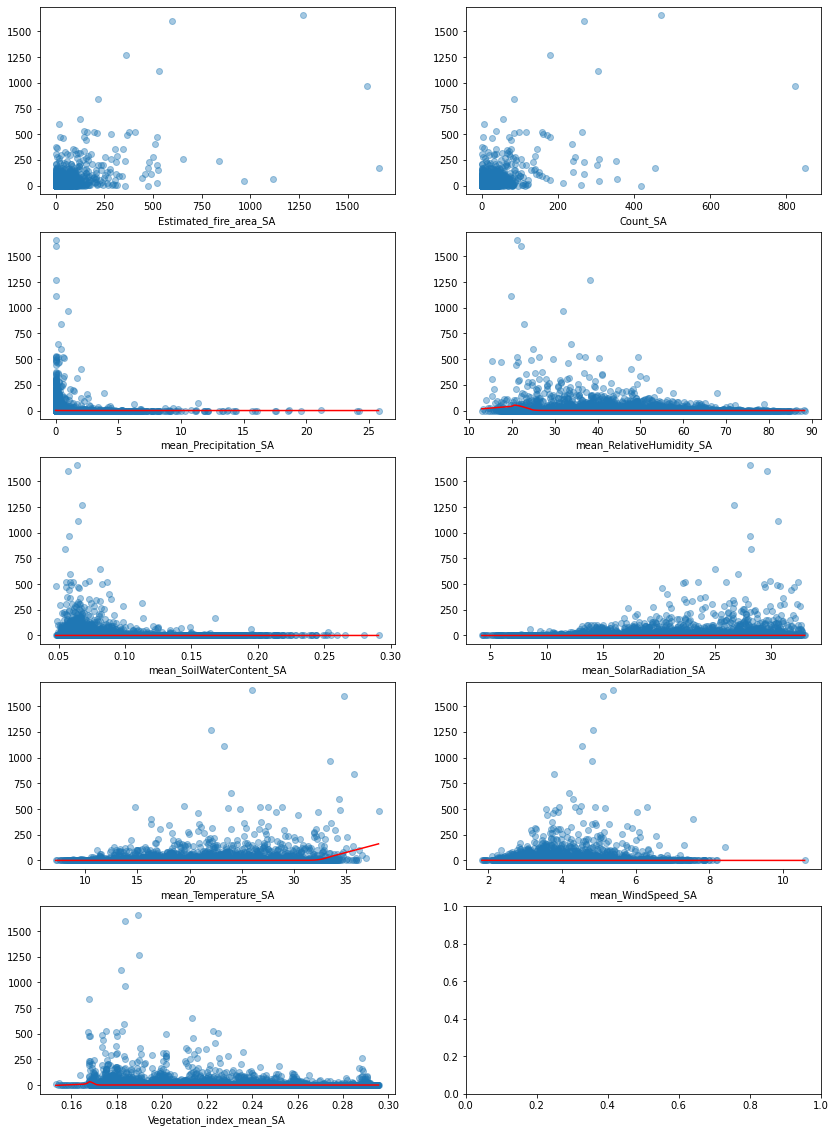

------------------------------------------------------------------------------------------------------------------------


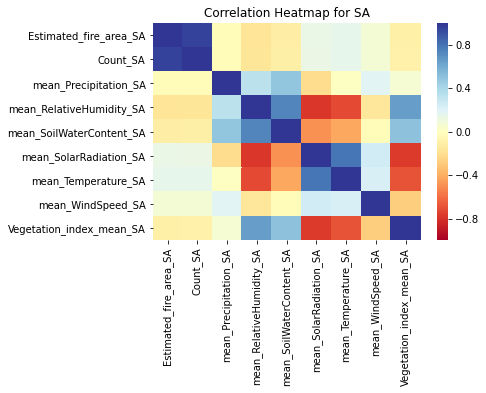

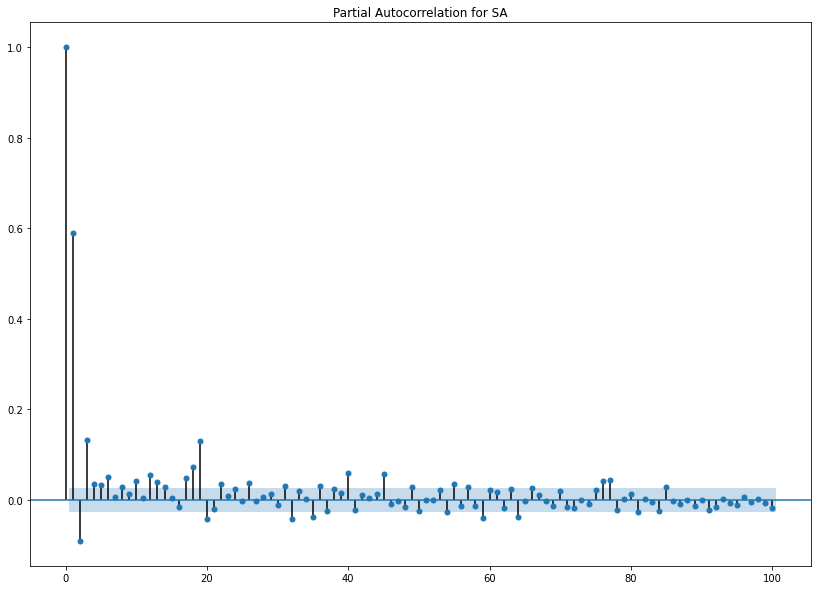

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- TA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


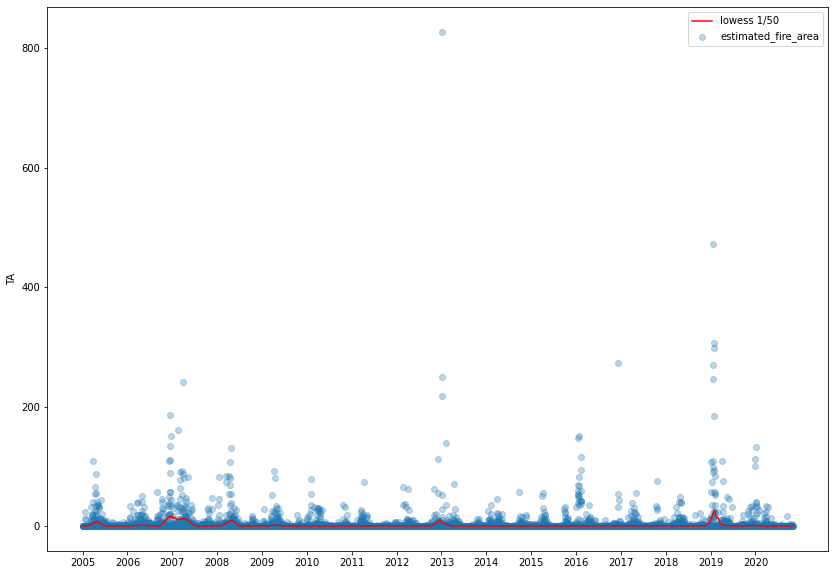

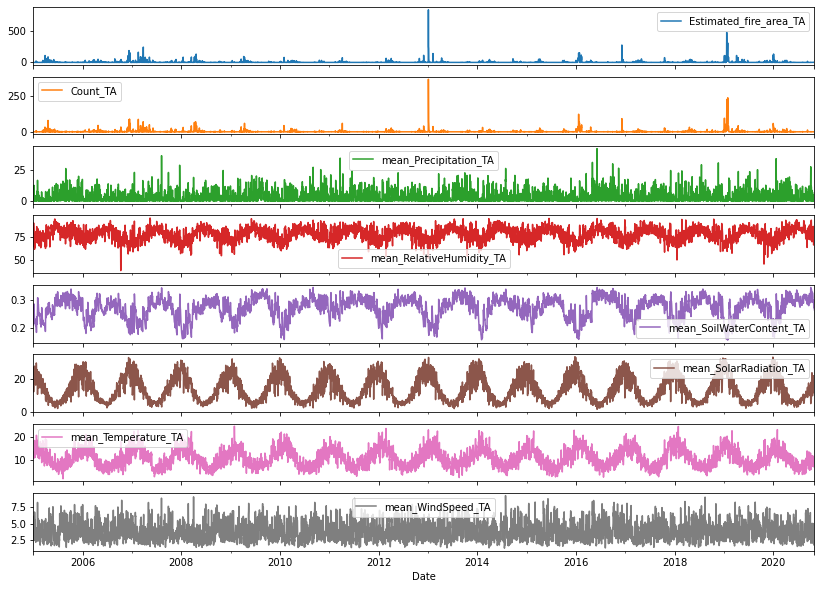

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



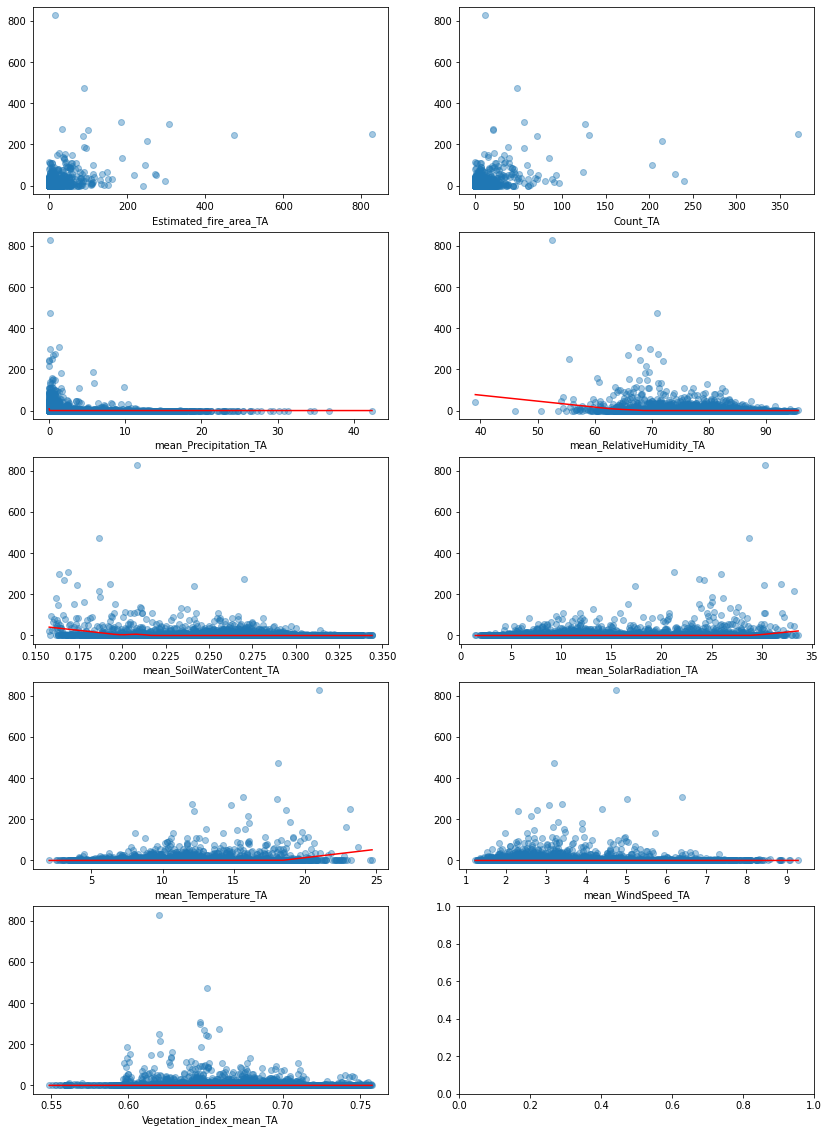

------------------------------------------------------------------------------------------------------------------------


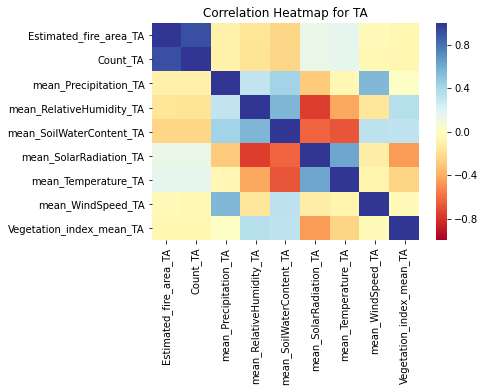

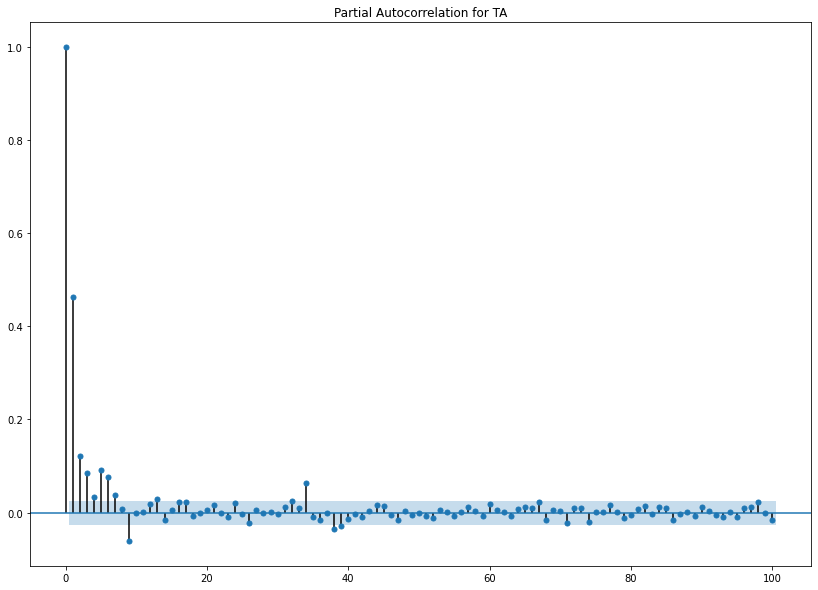

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- VI ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


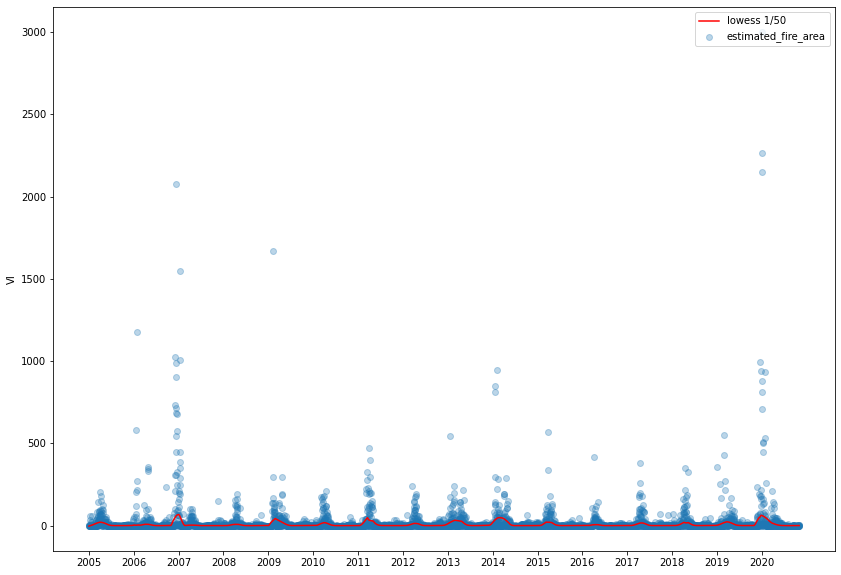

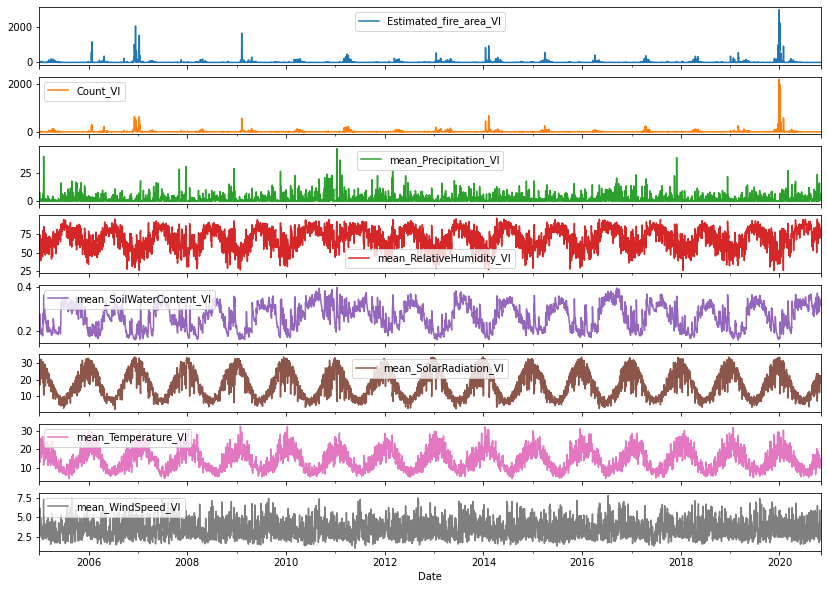

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



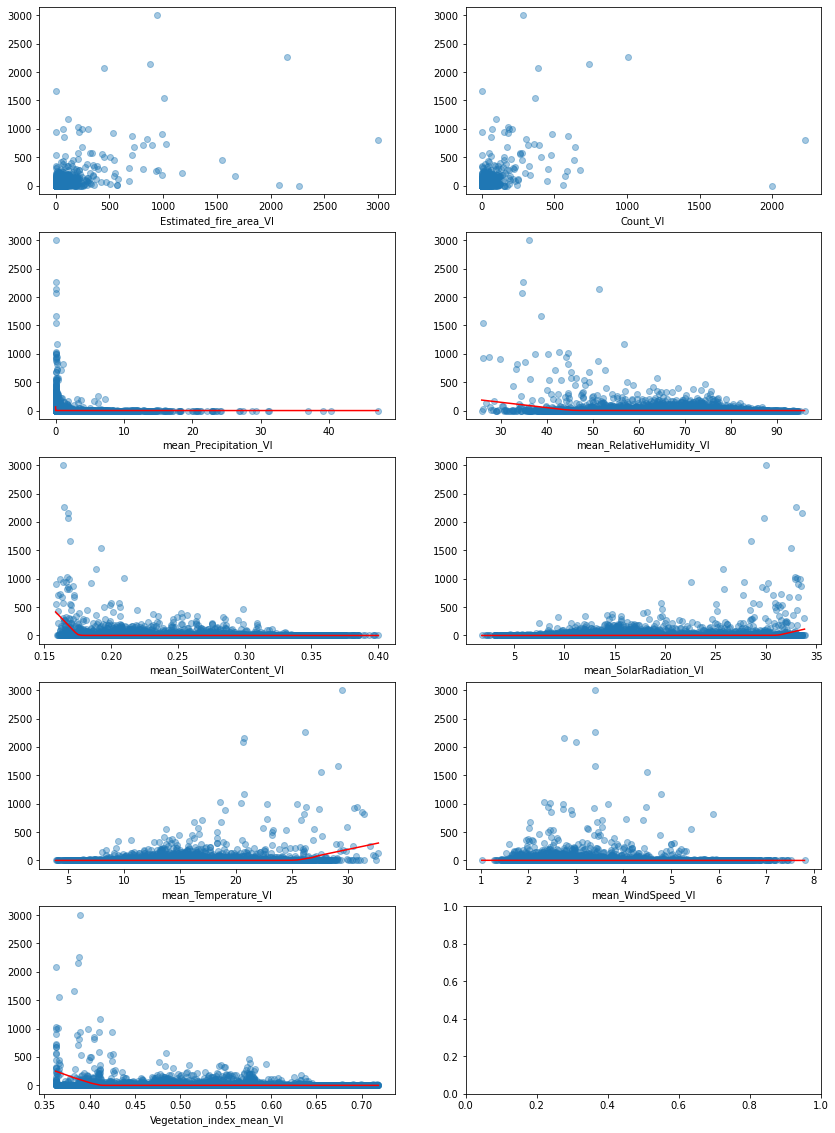

------------------------------------------------------------------------------------------------------------------------


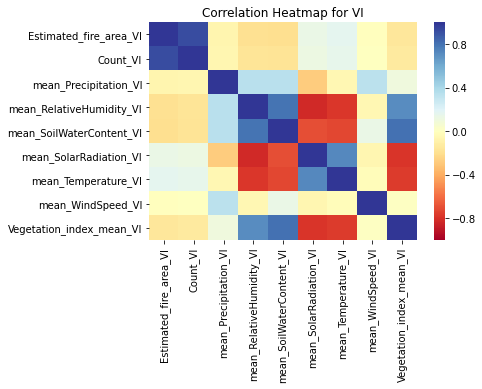

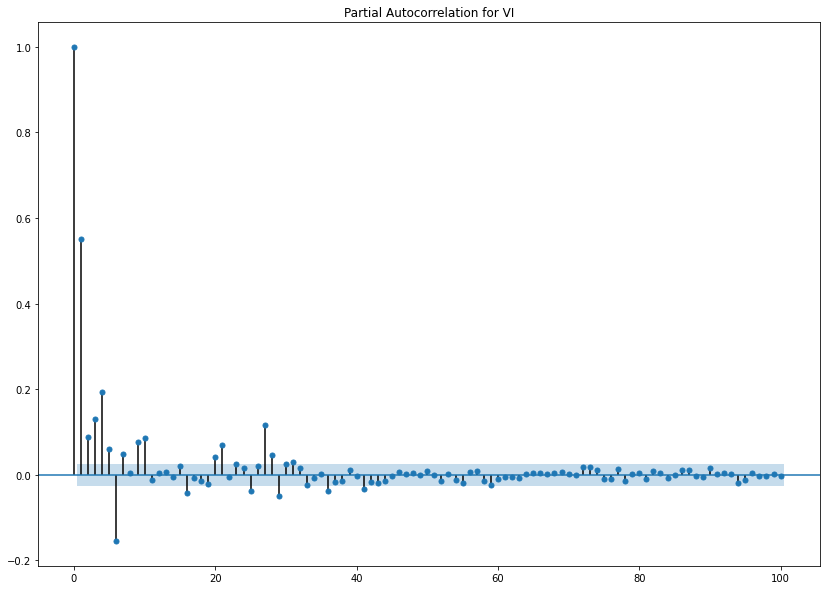

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- WA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


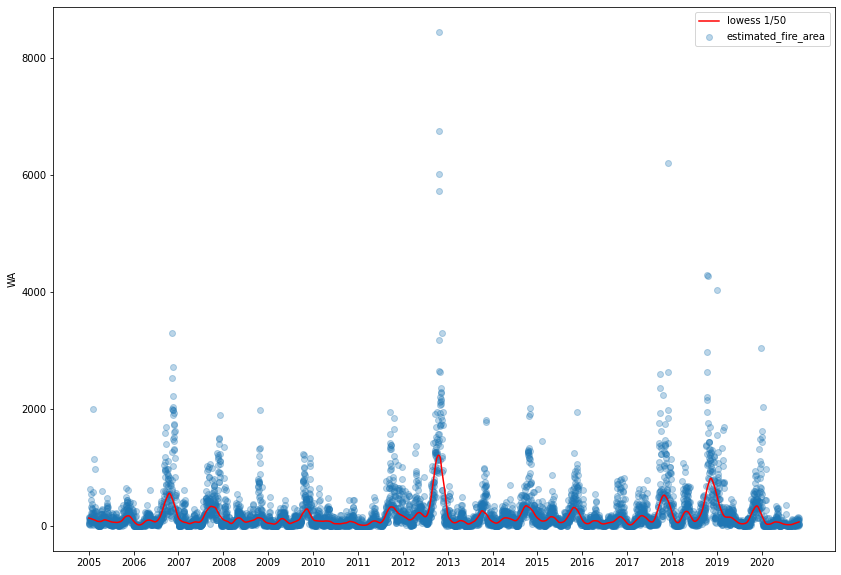

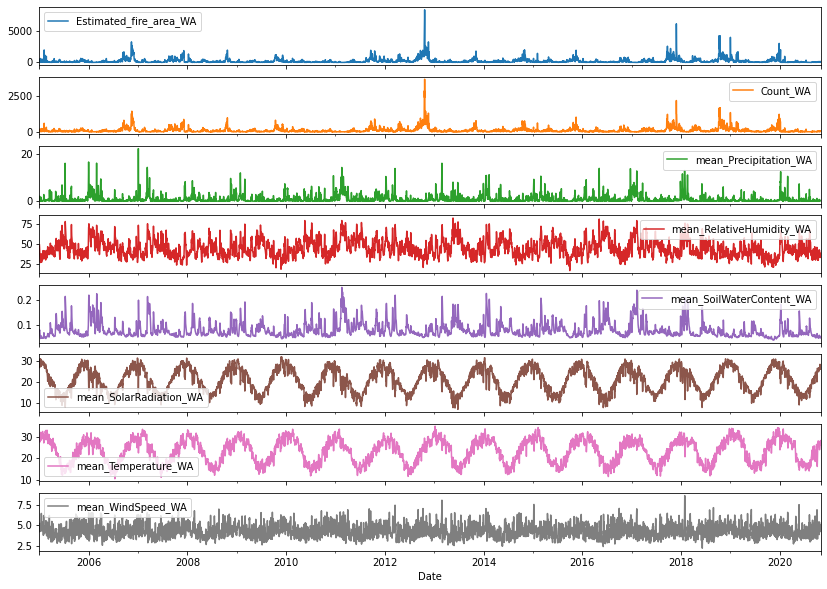

------------------------------------------------------------------------------------------------------------------------


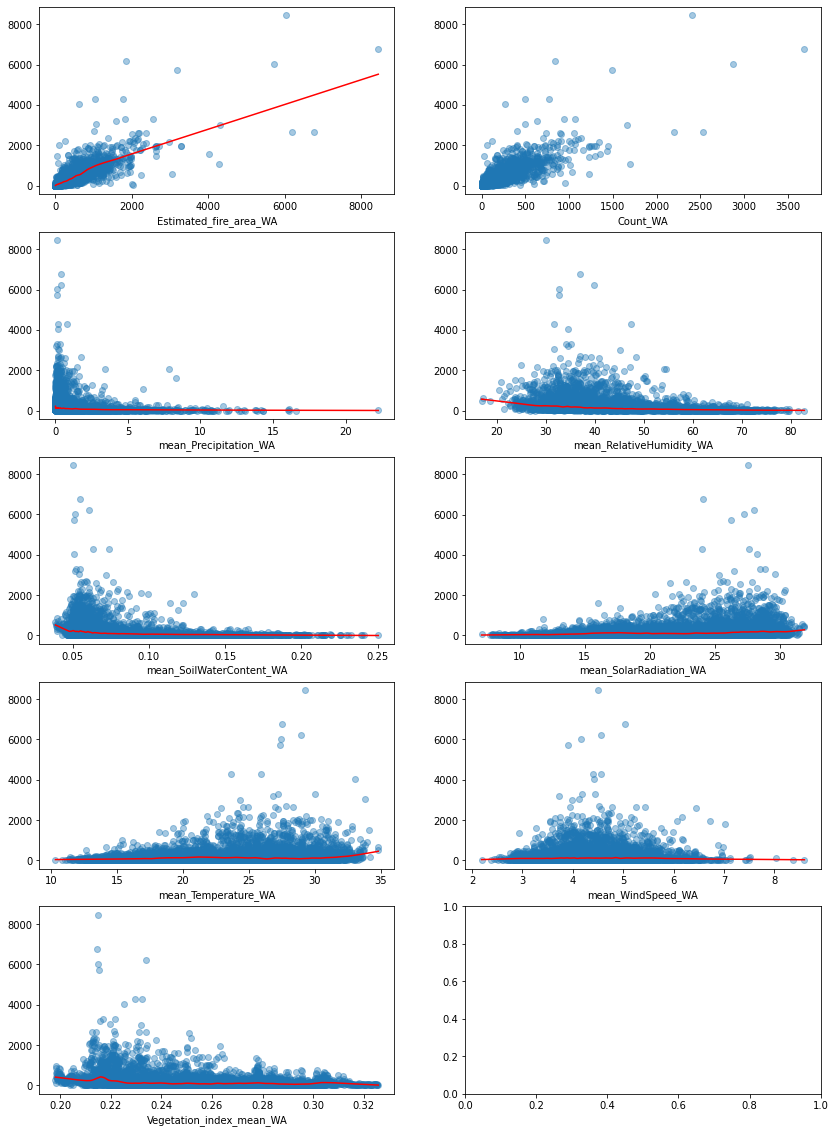

------------------------------------------------------------------------------------------------------------------------


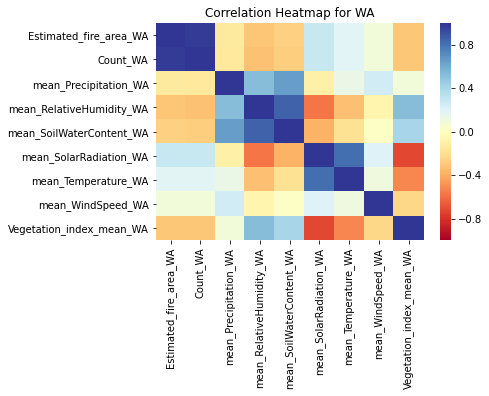

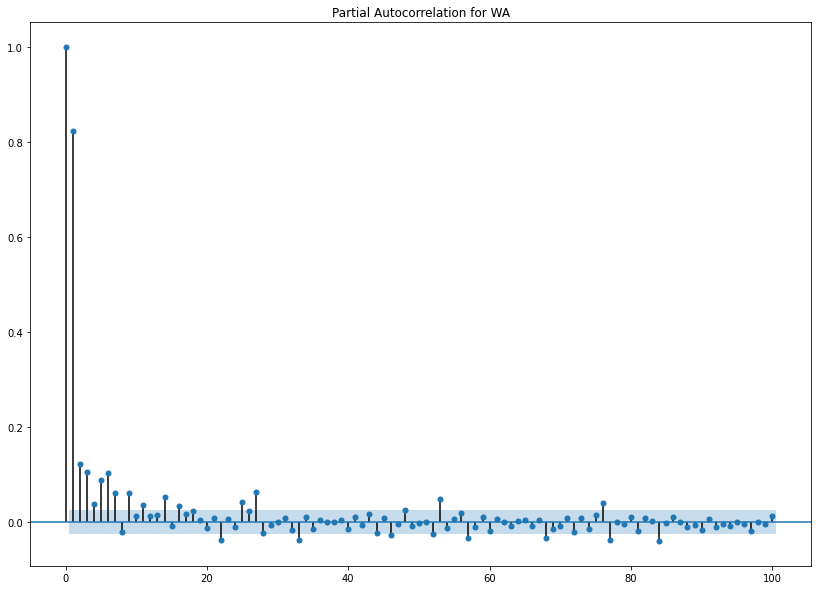

In [10]:
for each in regions:
    print('----' * 30)
    print('----' * 10, each, '----' * 19)
    print('----' * 30)
    df = pd.read_csv('{}_iso.csv'.format(each))
    df['Date'] = pd.to_datetime(df['Date'])

    for x in df.columns:
        df[x] = df[x].fillna(method='ffill')
    
    df.set_index('Date', inplace=True)
    
    
    

    
    columns = df.columns
    df['t_plus_1'] = df['Estimated_fire_area_{}'.format(each)].shift(-1)
    
    

    
    
    df['day'] = df.index.dayofyear
    df['_index'] = range(len(df))
    
    yhat = lowess(df['Estimated_fire_area_{}'.format(each)], df['_index'], frac = 1/50)

    plt.figure(figsize=(14,10))
    plt.scatter(df['_index'], df['Estimated_fire_area_{}'.format(each)], alpha = 0.3, label = 'estimated_fire_area')
    plt.plot(yhat.T[0], yhat.T[1], color = 'r', label = 'lowess 1/50')
    plt.xticks(df.loc[df['day'].eq(1)]['_index'].values,
              labels = df.loc[df['day'].eq(1)].index.year)
    plt.legend(loc='upper right')
    plt.ylabel(each)
    
    plt.show()

    
    
    df.iloc[:, :8].plot(subplots = True, figsize=(14,10))
    plt.show()

    print('----' * 30)
    
    
    fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (14,20))
    for i, x in enumerate(columns):

        
        yhat = lowess(df.dropna()['t_plus_1'], df.dropna()[x], frac = 1/20)
        ax[i//2][i%2].plot(yhat.T[0], yhat.T[1], color = 'r')
        ax[i//2][i%2].scatter(df.dropna()[x], df.dropna()['t_plus_1'], alpha = 0.4)
        ax[i//2][i%2].set_xlabel(x)


    plt.show()
    
    print('----' * 30)
    
    corr = df.iloc[:, :9].corr()

    sns.heatmap(corr, cmap = 'RdYlBu', vmin = -1, vmax = 1)
    plt.title('Correlation Heatmap for {}'.format(each))
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(14,10))
    plot_pacf(df['Estimated_fire_area_{}'.format(each)], lags = 100, ax = ax)

    ax.set_title('Partial Autocorrelation for {}'.format(each))
    plt.show();

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- NSW ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


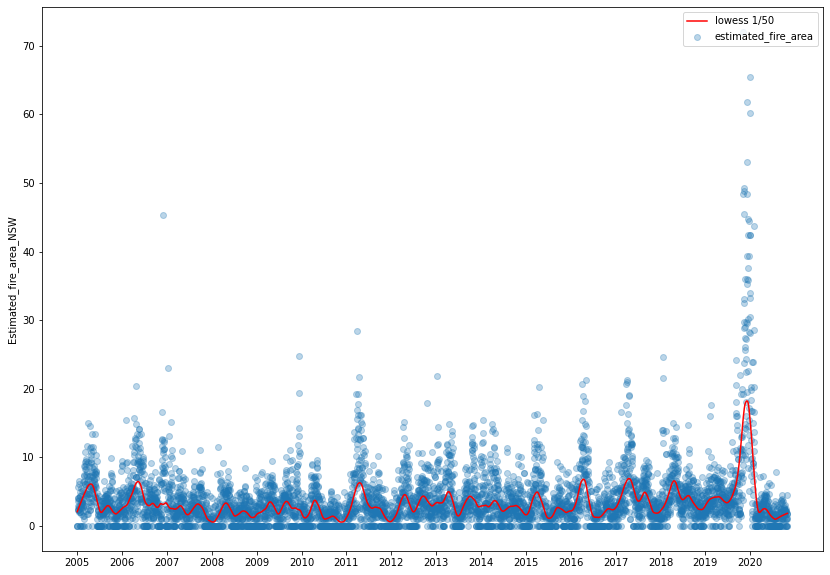

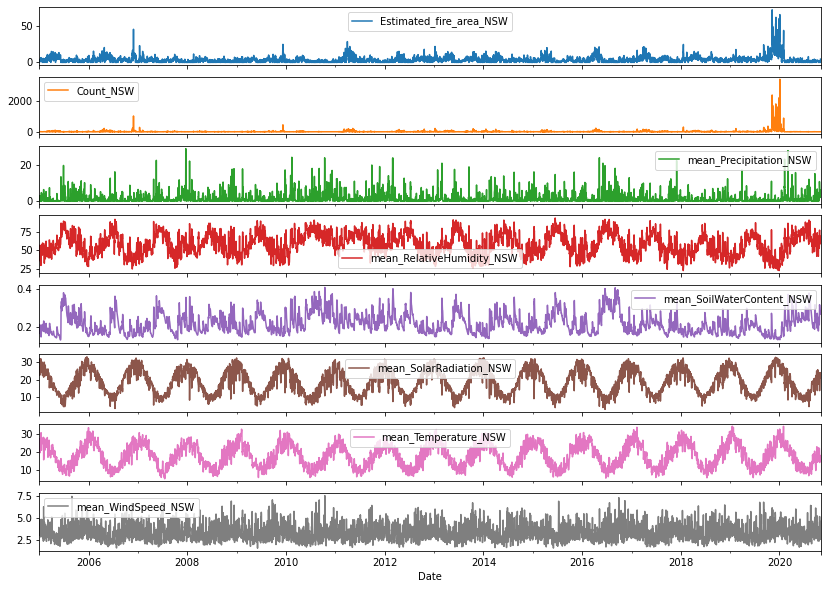

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



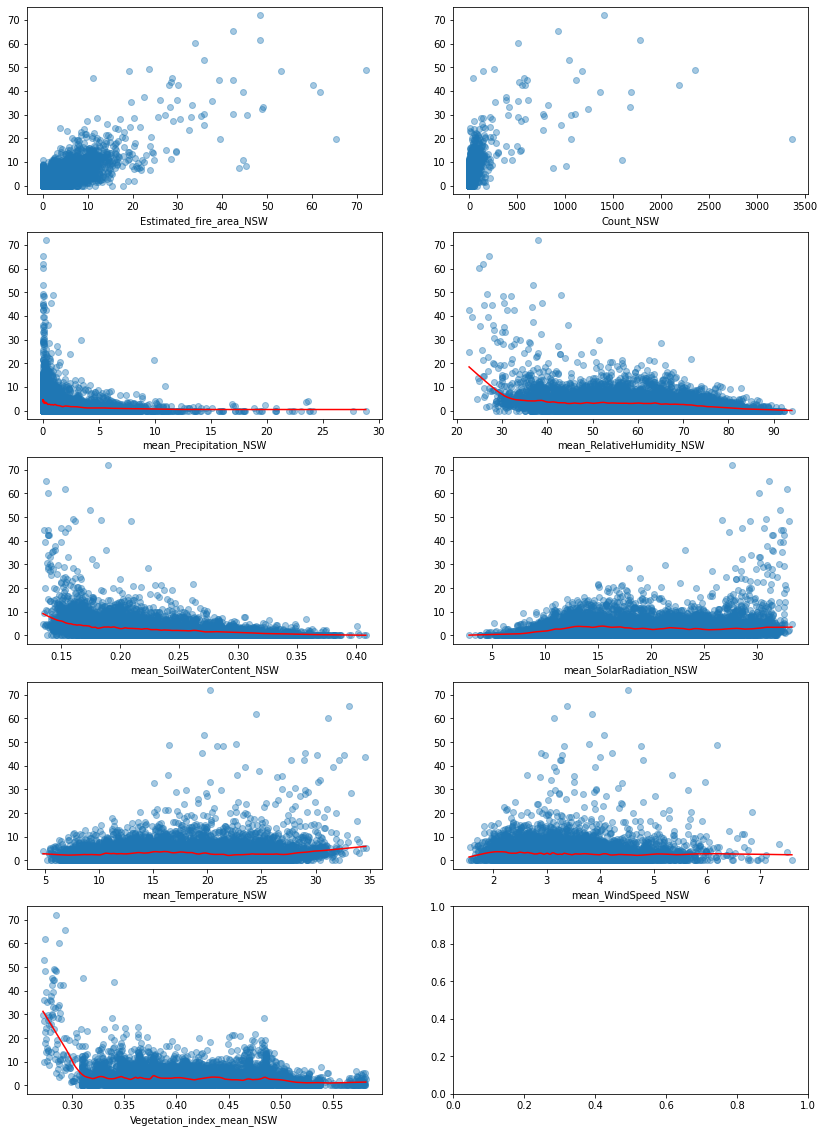

------------------------------------------------------------------------------------------------------------------------


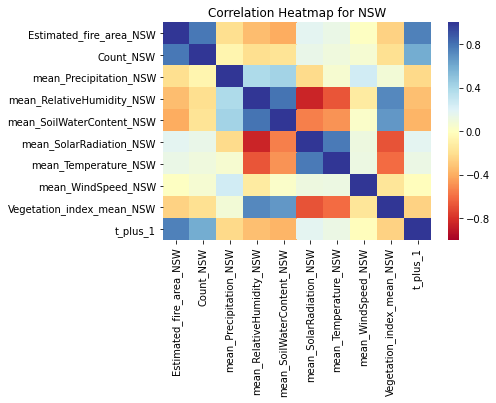

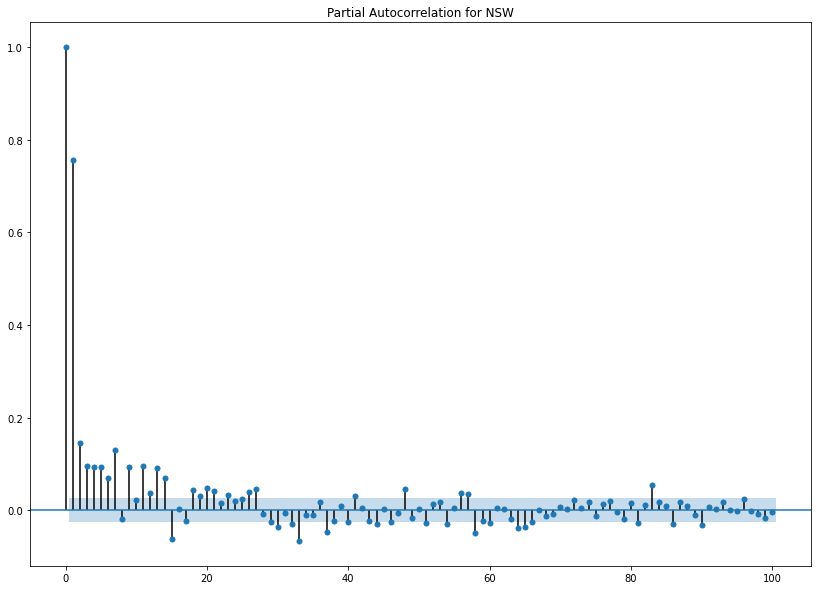

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- NT ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


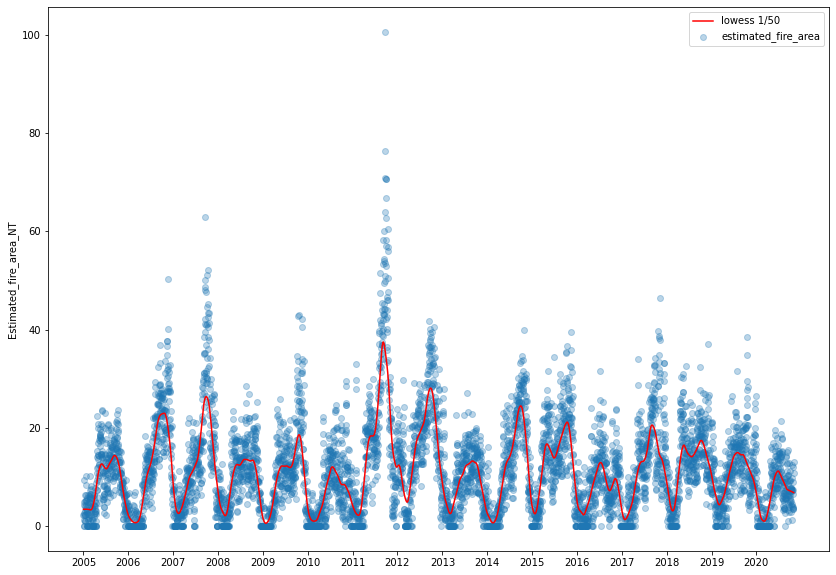

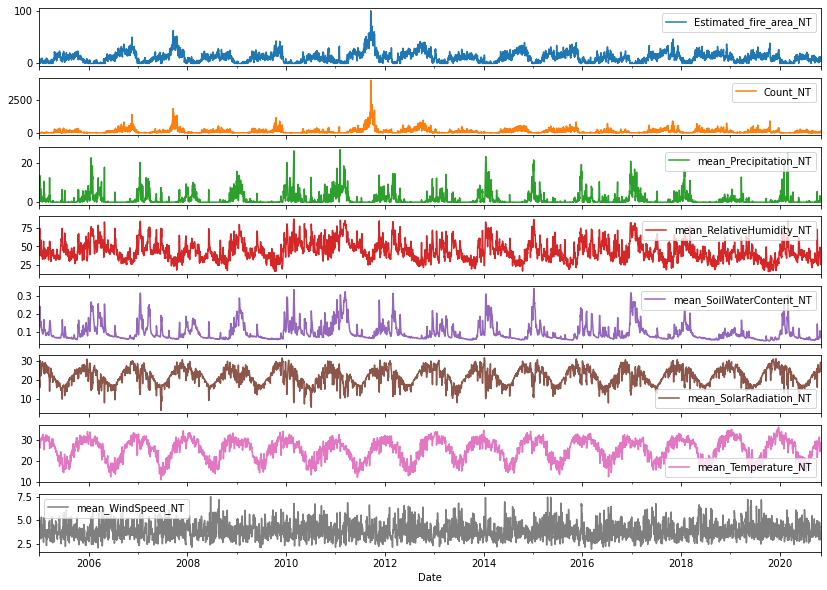

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



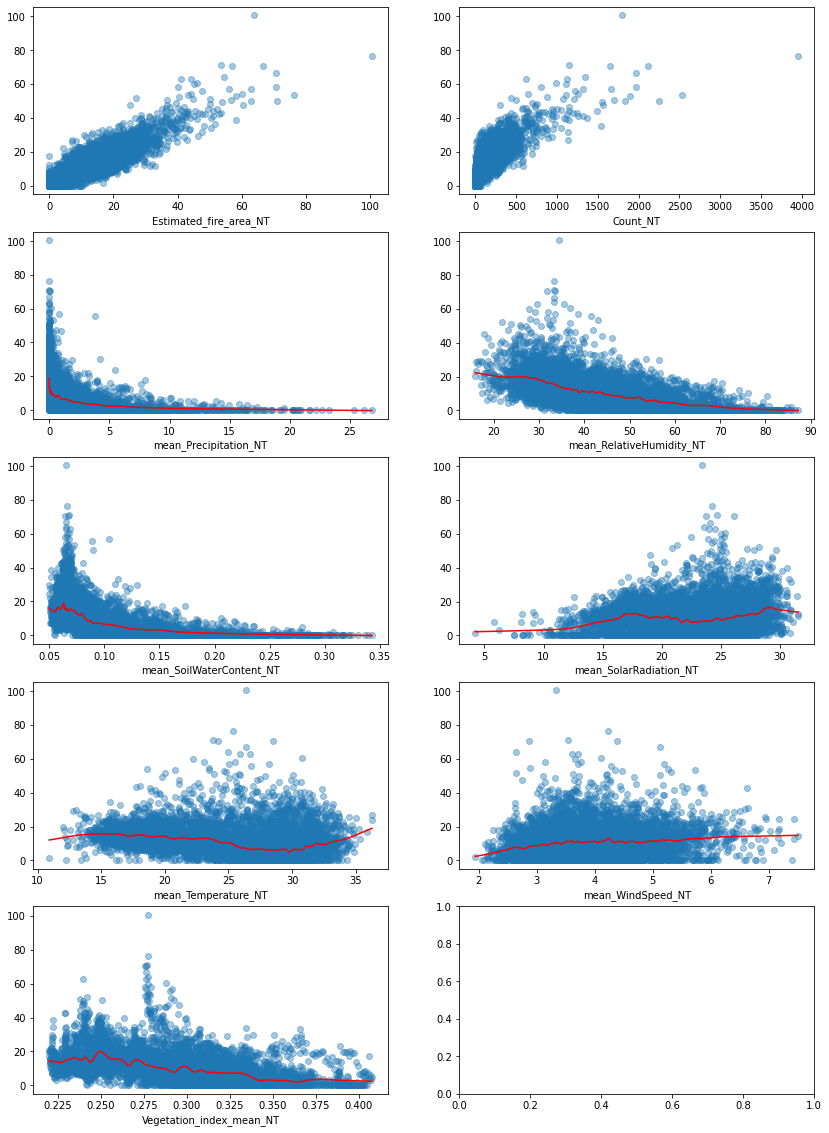

------------------------------------------------------------------------------------------------------------------------


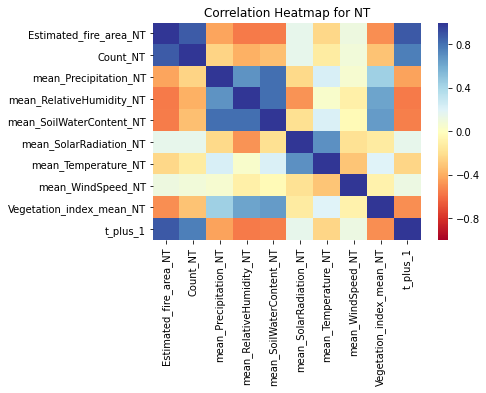

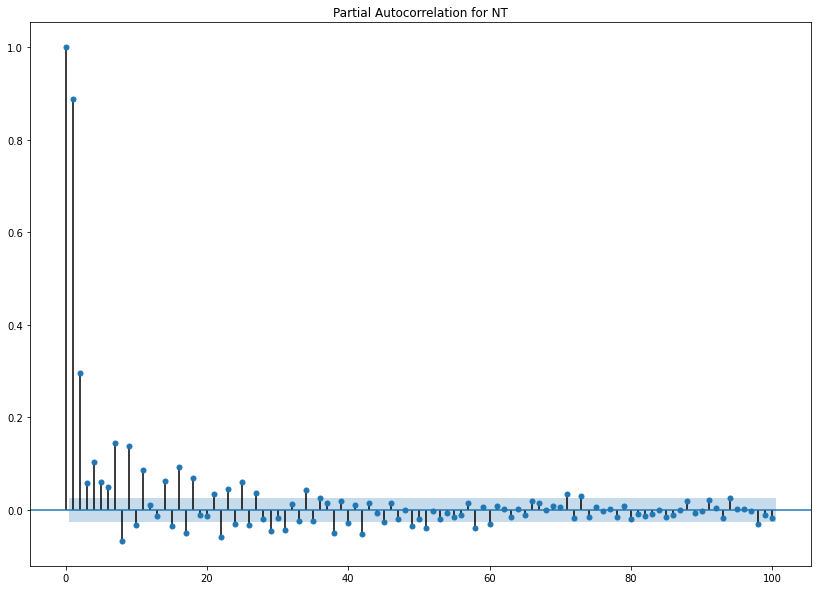

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- QL ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


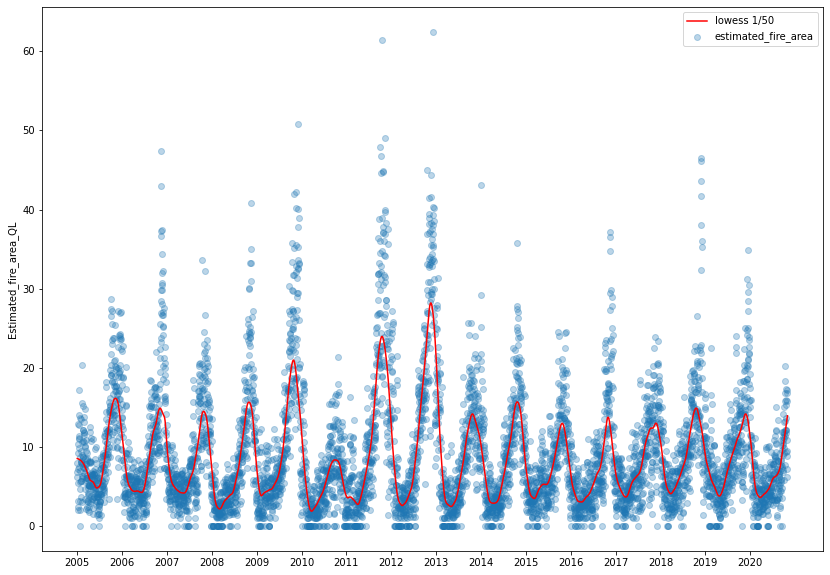

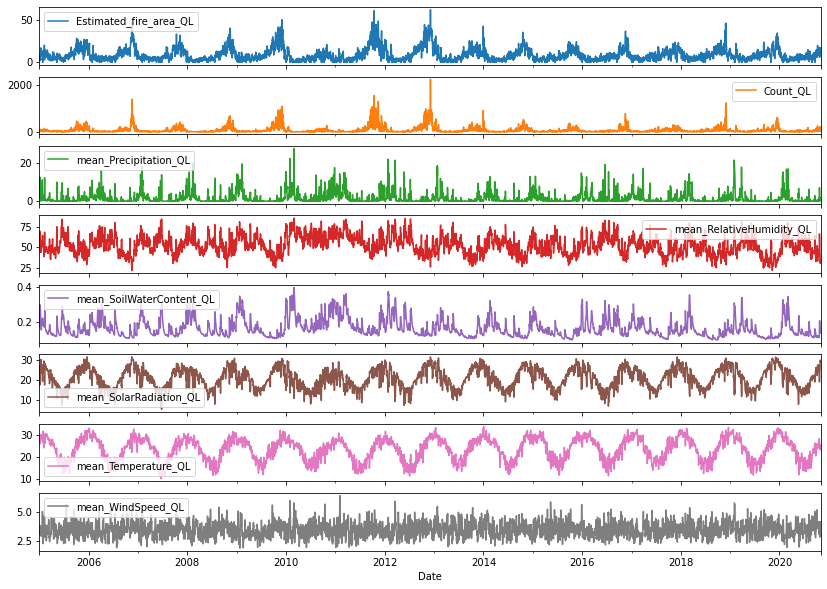

------------------------------------------------------------------------------------------------------------------------


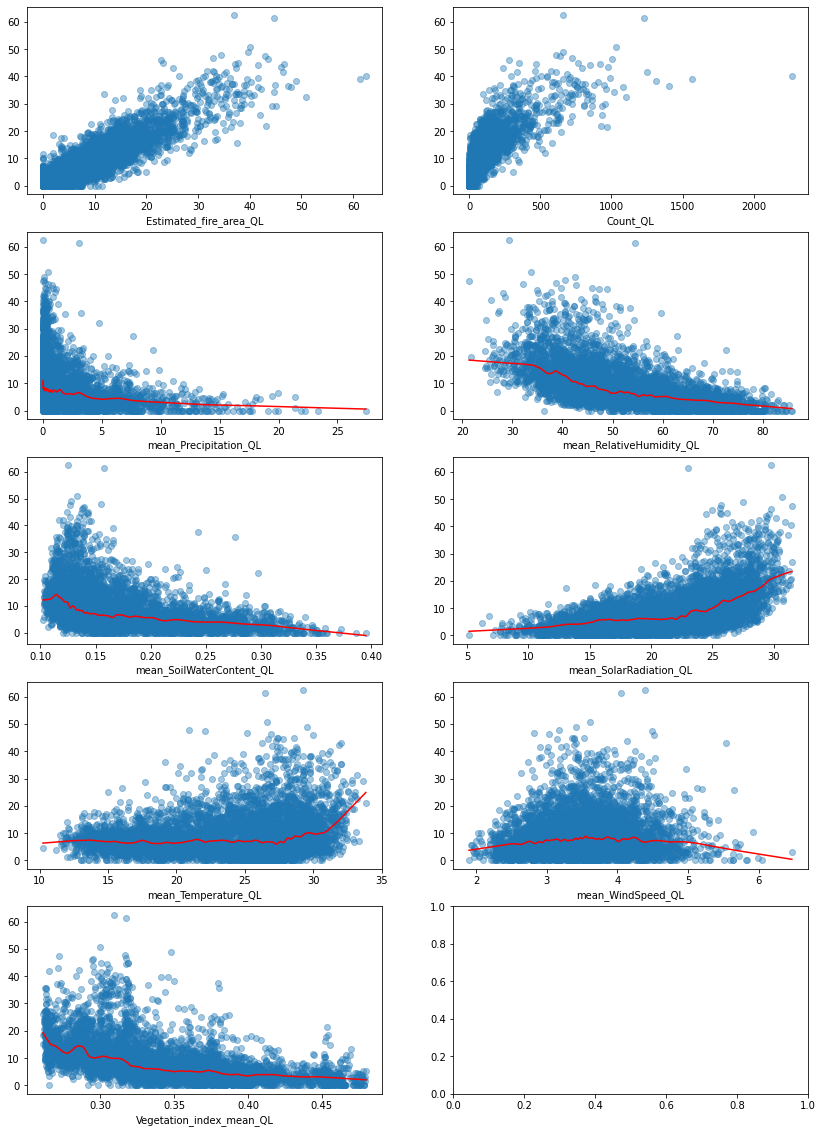

------------------------------------------------------------------------------------------------------------------------


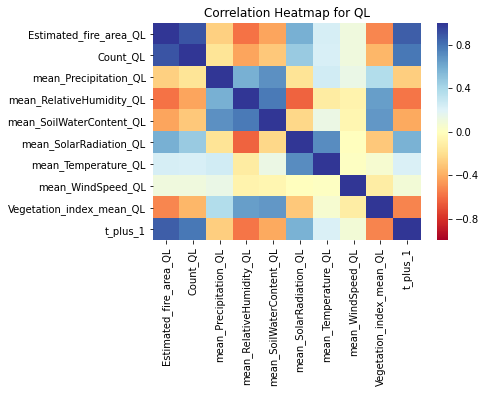

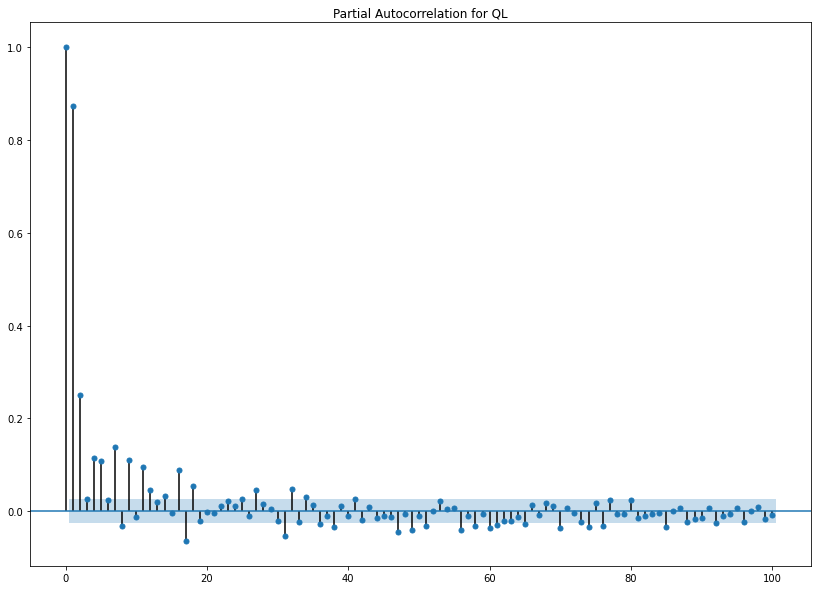

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- SA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


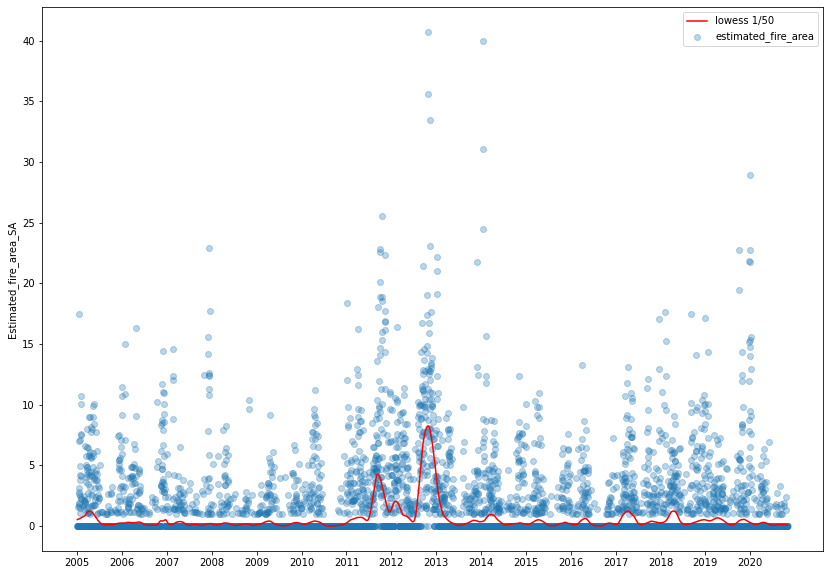

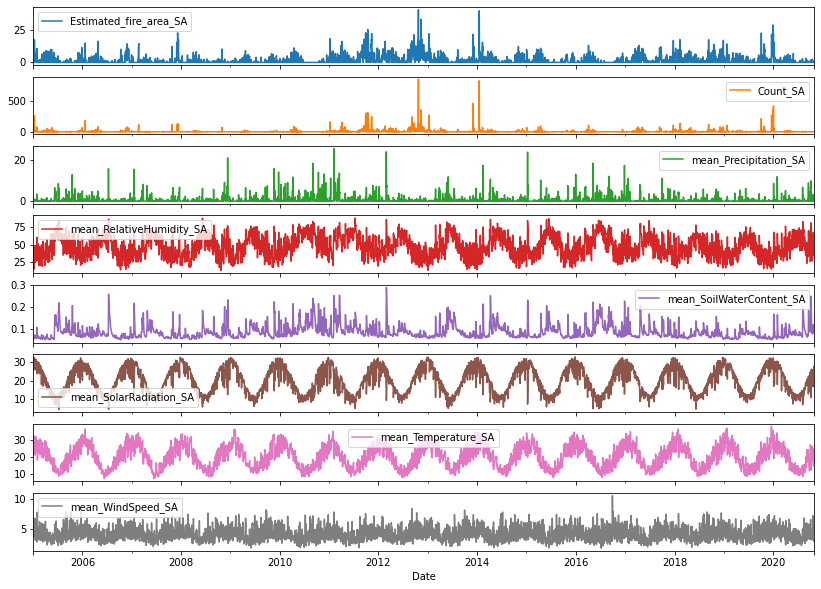

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



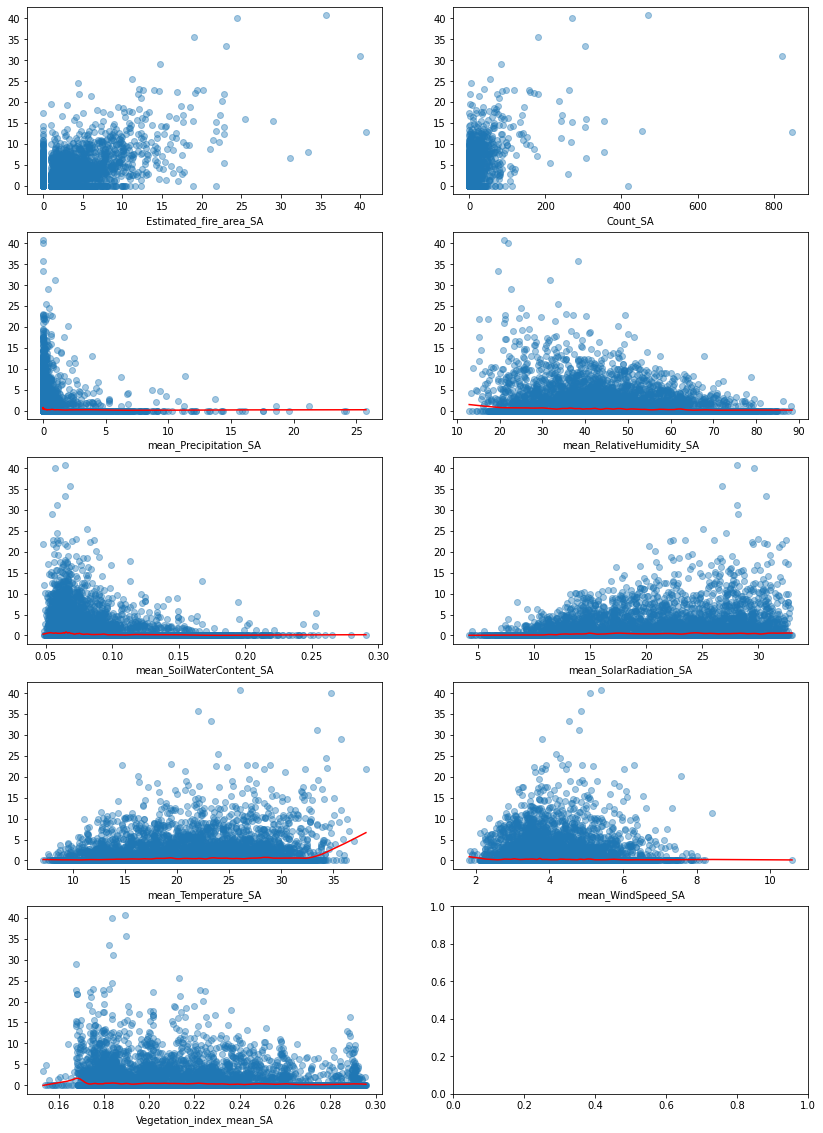

------------------------------------------------------------------------------------------------------------------------


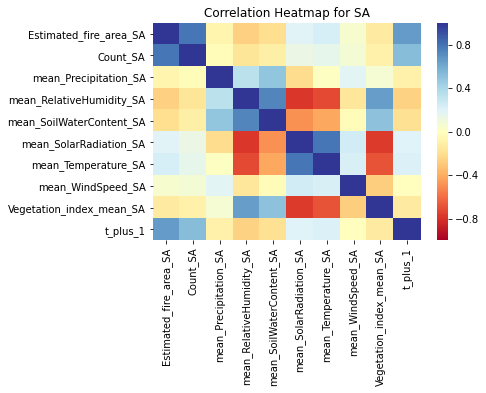

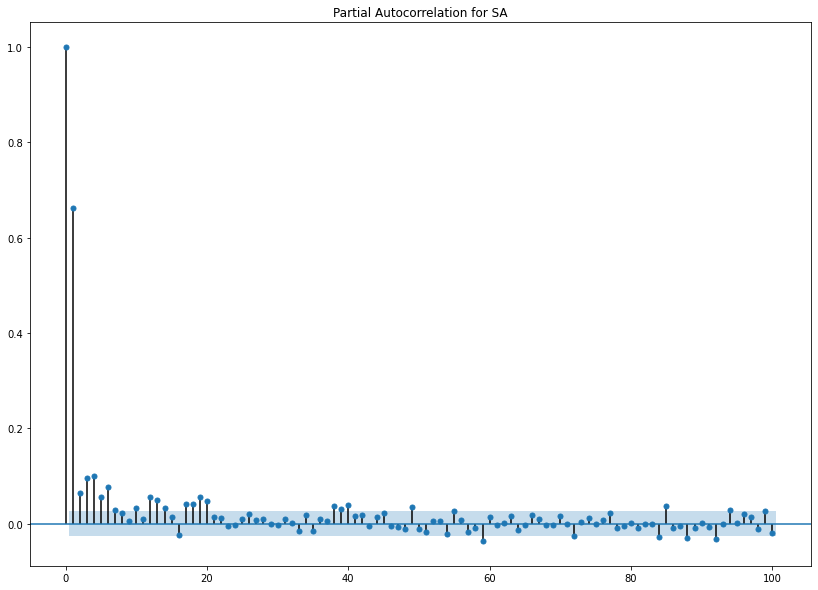

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- TA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


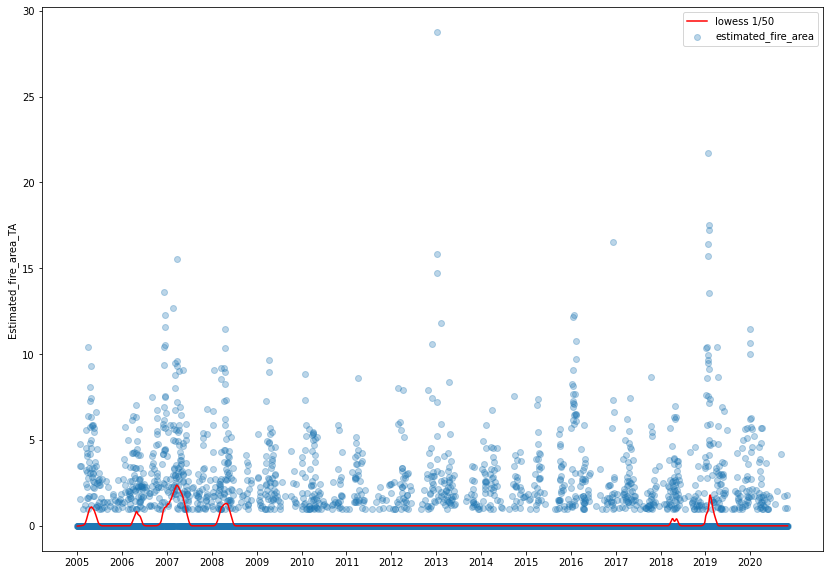

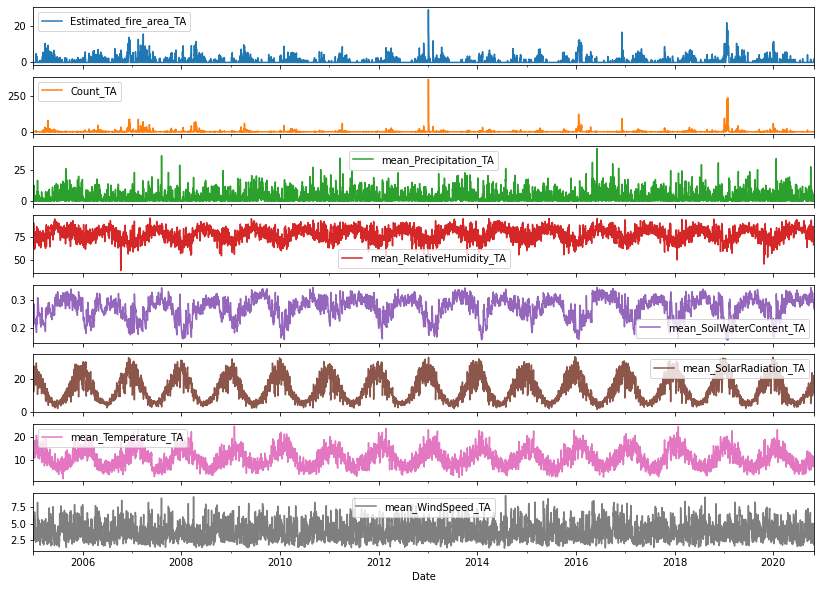

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



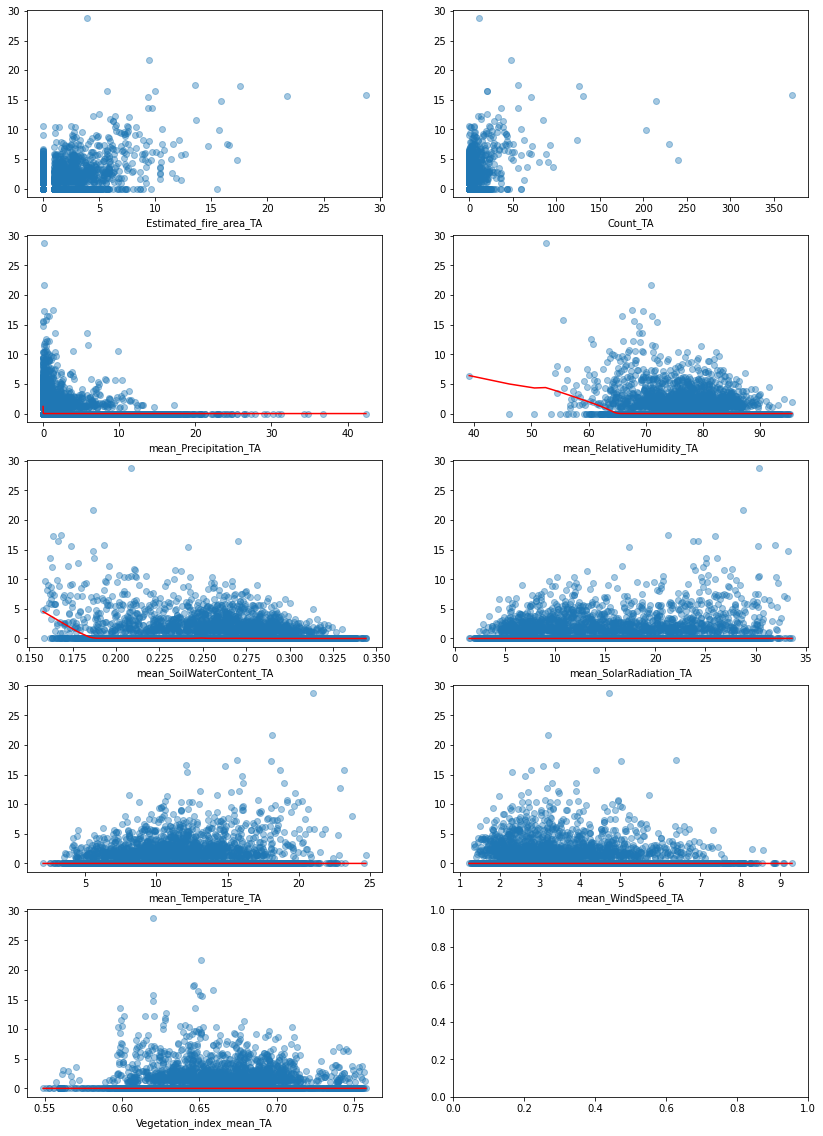

------------------------------------------------------------------------------------------------------------------------


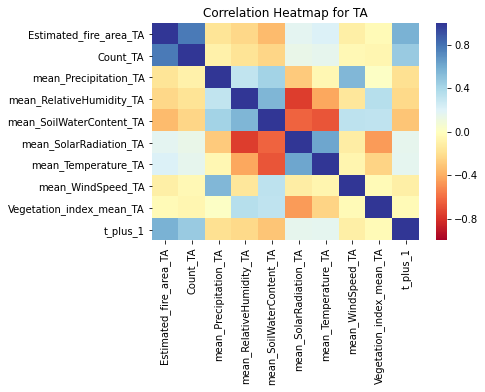

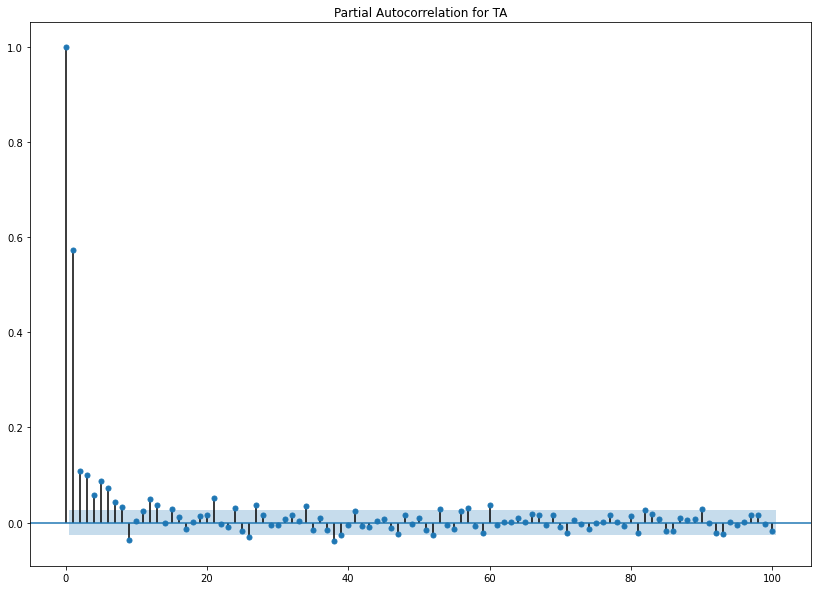

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- VI ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


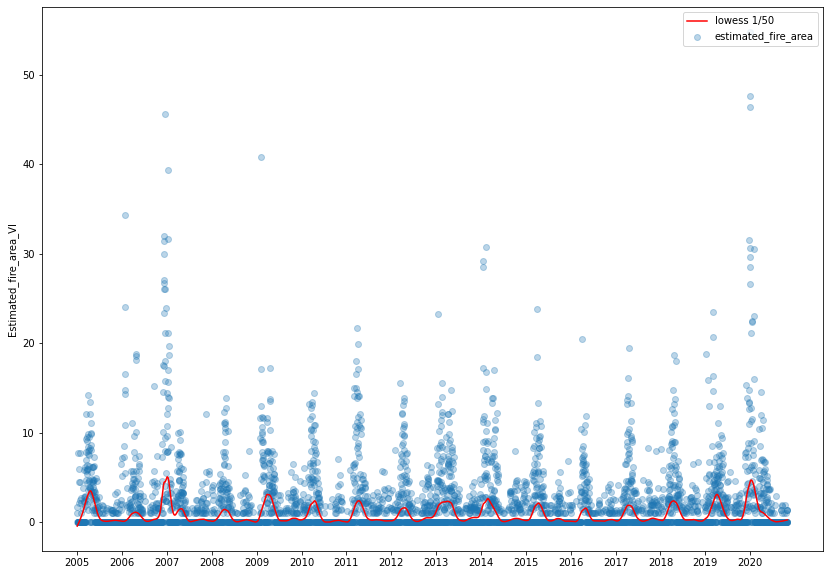

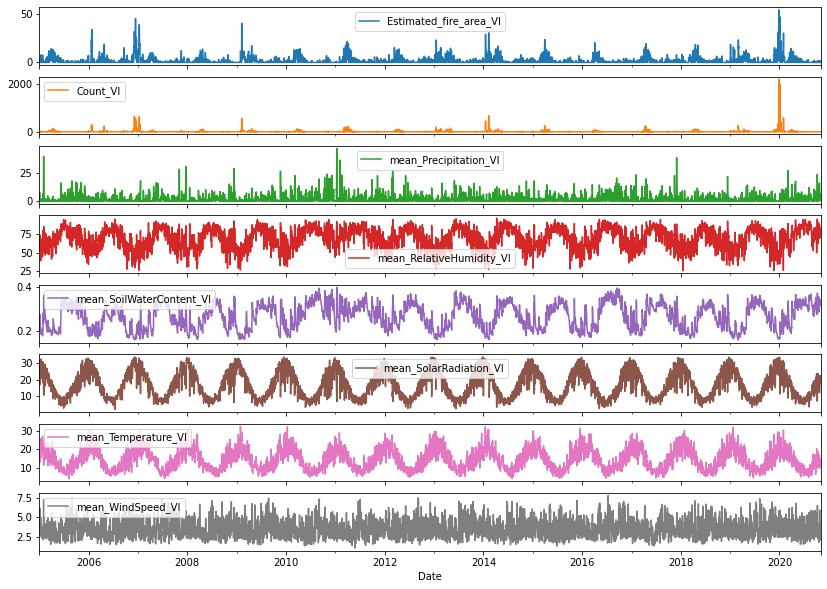

------------------------------------------------------------------------------------------------------------------------


C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\albert\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide



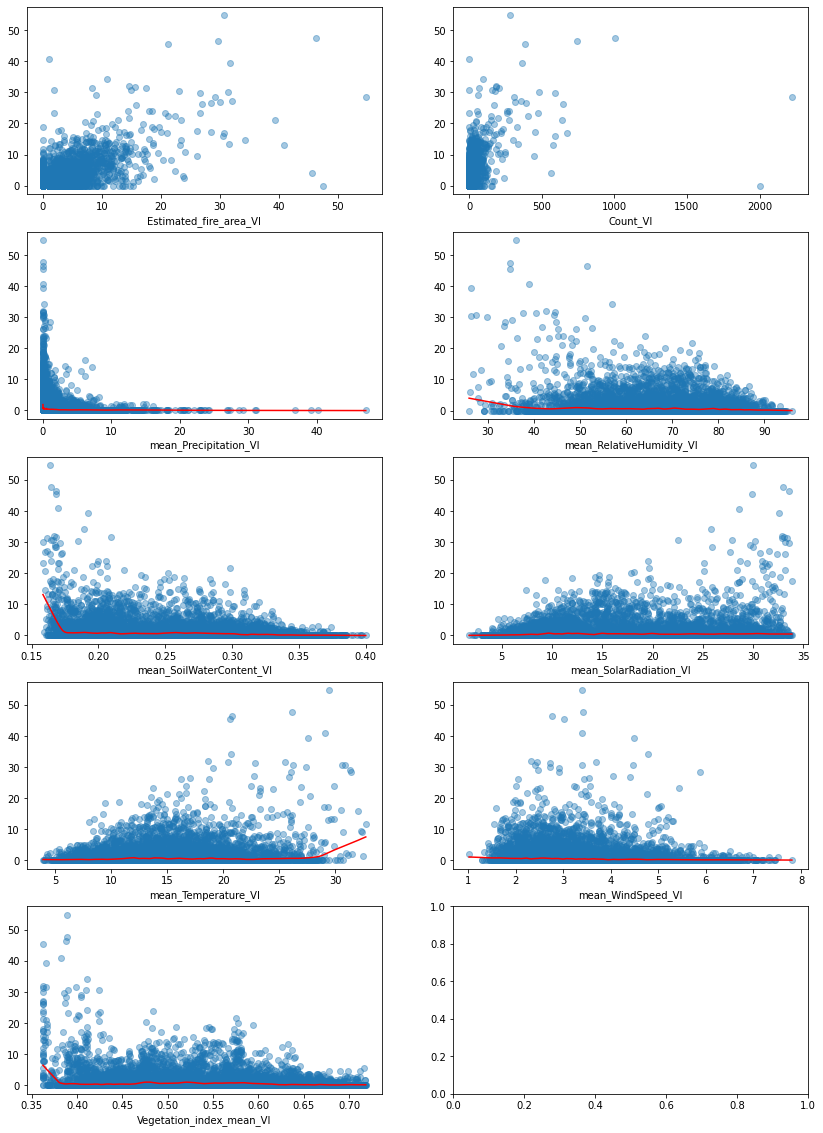

------------------------------------------------------------------------------------------------------------------------


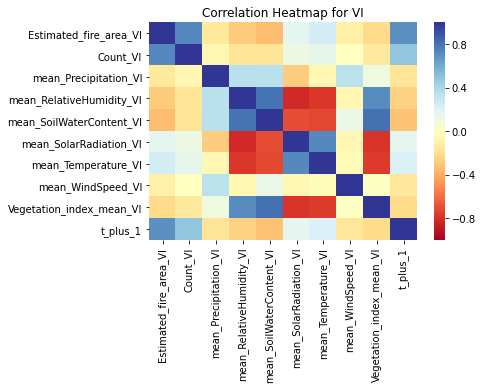

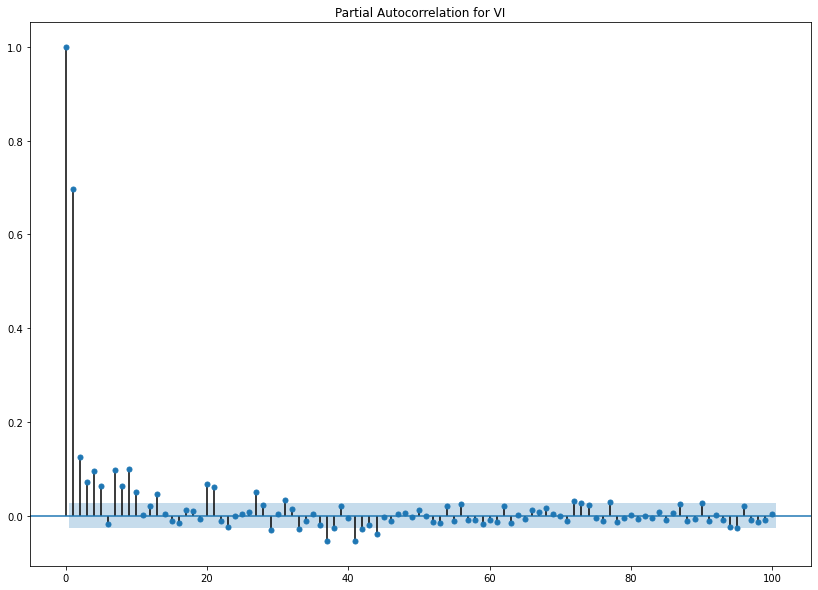

------------------------------------------------------------------------------------------------------------------------
---------------------------------------- WA ----------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


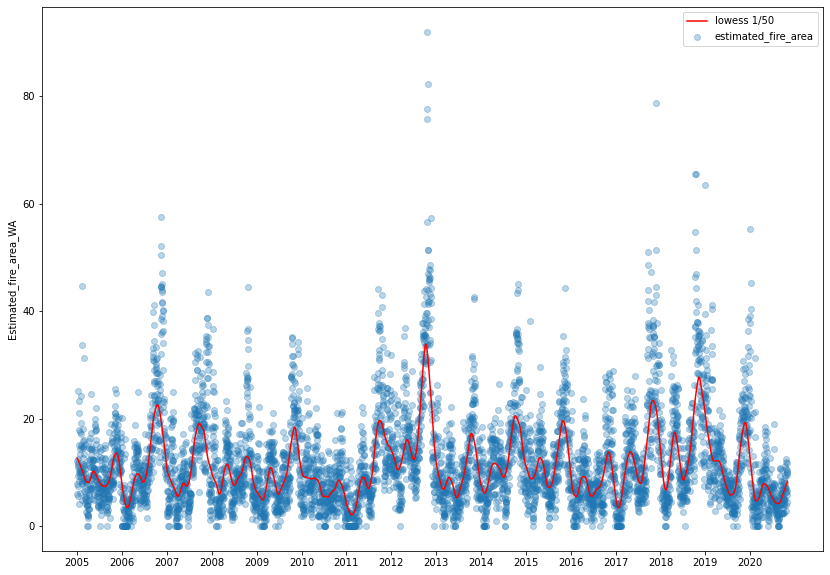

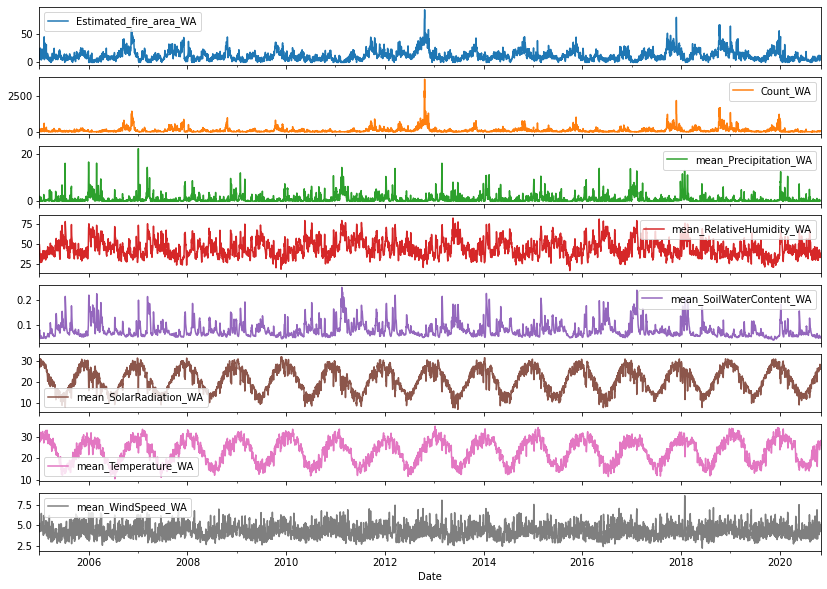

------------------------------------------------------------------------------------------------------------------------


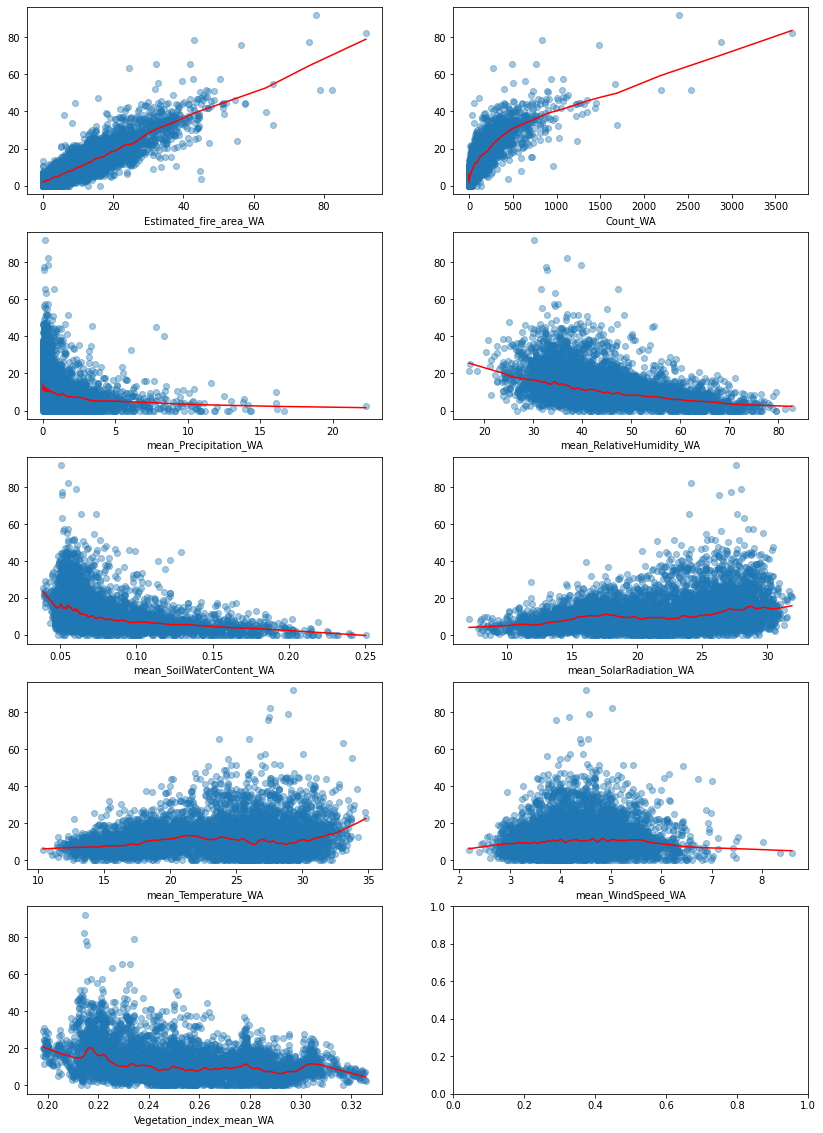

------------------------------------------------------------------------------------------------------------------------


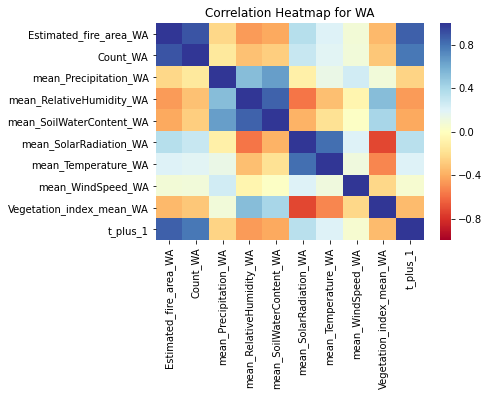

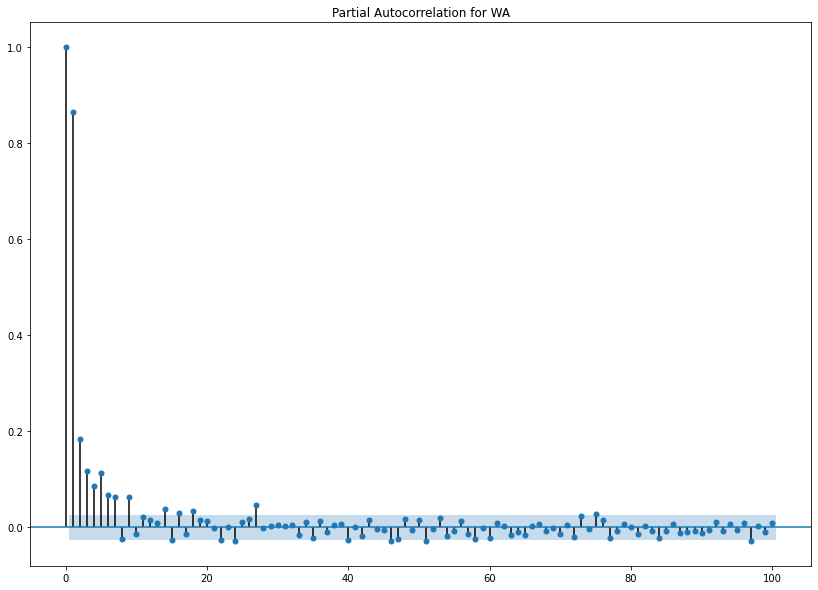

In [17]:
for each in regions:
    print('----' * 30)
    print('----' * 10, each, '----' * 19)
    print('----' * 30)
    df = pd.read_csv('{}_iso.csv'.format(each))
    df['Date'] = pd.to_datetime(df['Date'])
    df['Estimated_fire_area_{}'.format(each)] = df['Estimated_fire_area_{}'.format(each)].fillna(0)
    for x in df.columns:
        df[x] = df[x].fillna(method='ffill')
    
    df.set_index('Date', inplace=True)
    
    #plot for square roots instead
    df['Estimated_fire_area_{}'.format(each)] = np.sqrt(df['Estimated_fire_area_{}'.format(each)])
    

    
    columns = df.columns
    df['t_plus_1'] = df['Estimated_fire_area_{}'.format(each)].shift(-1)
    
    

    
    
    df['day'] = df.index.dayofyear
    df['_index'] = range(len(df))
    
    yhat = lowess(df['Estimated_fire_area_{}'.format(each)], df['_index'], frac = 1/50)

    plt.figure(figsize=(14,10))
    plt.scatter(df['_index'], df['Estimated_fire_area_{}'.format(each)], alpha = 0.3, label = 'estimated_fire_area')
    plt.plot(yhat.T[0], yhat.T[1], color = 'r', label = 'lowess 1/50')
    plt.xticks(df.loc[df['day'].eq(1)]['_index'].values,
              labels = df.loc[df['day'].eq(1)].index.year)
    plt.legend(loc='upper right')
    plt.ylabel('Estimated_fire_area_{}'.format(each))
    
    plt.show()

    
    
    df.iloc[:, :8].plot(subplots = True, figsize=(14,10))
    plt.show()

    print('----' * 30)
    
    
    fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (14,20))
    for i, x in enumerate(columns):

        
        yhat = lowess(df.dropna()['t_plus_1'], df.dropna()[x], frac = 1/20)
        ax[i//2][i%2].plot(yhat.T[0], yhat.T[1], color = 'r')
        ax[i//2][i%2].scatter(df.dropna()[x], df.dropna()['t_plus_1'], alpha = 0.4)
        ax[i//2][i%2].set_xlabel(x)
        


    plt.show()
    
    print('----' * 30)
    
    corr = df.iloc[:, :10].corr()

    sns.heatmap(corr, cmap = 'RdYlBu', vmin = -1, vmax = 1)
    plt.title('Correlation Heatmap for {}'.format(each))
    plt.show()
    
    
    fig, ax = plt.subplots(figsize=(14,10))
    plot_pacf(df['Estimated_fire_area_{}'.format(each)], lags = 100, ax = ax)

    ax.set_title('Partial Autocorrelation for {}'.format(each))
    plt.show();